## Julia's streamflow data

#### The main objective of this script is to pre-process the streamflow data for the countries that Julia was in charge.

The objective if to filter only gauges with less than 50% of failures to be concatenated in the next step. 

#### The countries that will be used are: Belgium (BE), Czech (CZ), Denmark (DK), Finland (FI), Luxemburg (LU), Netherlands (NL), Norway (NO), Sweden (SE):

Written by: Thiago Victor Medeiros do Nascimento

First we import some useful modules:

In [1]:
import geopandas as gpd                                      # Pandas for geospatial analysis
from shapely.geometry import Point, Polygon                  # Module used for geospatial analysis     
import pymannkendall as mk                                   # Module used for trend-computation
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings                                              
import datetime                                              # Datetime module pretty useful for time-series analysis
import tqdm as tqdm                                          # Useful module to access the progress bar of a loop
import os
import glob
warnings.simplefilter(action='ignore', category=Warning)     # Module useful for taking out some unecessary warnings


%config Completer.use_jedi = False                           # This improve the auto-fill function

import geospatialfunctions as geospatialfunctions            # Geospatialfunctions is a module with useful functions

First we should set our directory:

In [2]:
path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Datasets"
os.chdir(path)
os.getcwd()

'C:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Datasets'

Here we can import the full time-series and the pre-processed network information.

1. Belgium:

In [12]:
# Network:
network_BE = pd.read_excel(r"Julia\timeseries\original\network_BE.xlsx")

# Here we clean our dataframe for only the useful columns:
network_BE = network_BE[["ID", "Gauge Name", "Stream", "Catchment Area [km2]", "Upstream distance from confluence [km]", "Long E", "Lat N"]]

# For Belgium we do not have the elevation information:
network_BE.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]
network_BE.elev = np.nan

# Here we assing the country:
network_BE["country"] = "BE"

# Now we assing the code column to be str:
network_BE.code = network_BE.code.astype(str)

network_BE.set_index("code", inplace = True)

network_BE

name                     river   area  elev       lon  \
code                                                                     
10461002      Bierges                      Dyle  310.0   NaN  4.606129   
19511002       Tubize                     Senne  215.0   NaN  4.196446   
23711002   Ronquieres                     Samme  135.0   NaN  4.224809   
29521002   Irchonwelz           DendreOrientale  126.0   NaN  3.751661   
29711002          Ath           DendreOrientale  229.0   NaN  3.777834   
...               ...                       ...    ...   ...       ...   
60000000  Erembodegem                    Dender    NaN   NaN  4.060017   
60000001      Lembeek  Kanaal Brussel Charleroi    NaN   NaN  4.220223   
70000000      Haringe                     Ijzer    NaN   NaN  2.608001   
70000001    Merendree     Afleidingskanaal Leie    NaN   NaN  3.562876   
70000002  Geel Zammel                Grote Nete    NaN   NaN  4.946106   

                lat country  
code                         
10461002  50.710583      BE  
19511002  50.690256      BE  
23711002  50.605923      BE  
29521002  50.618903      BE  
29711002  50.633521      BE  
...             ...     ...  
60000000  50.920076      BE  
60000001  50.708053      BE  
70000000  50.910322      BE  
70000001  51.089907      BE  
70000002  51.091761      BE  

[168 rows x 7 columns]

In [13]:
# Time-series:
# Data lecture:
timeseries_BE = pd.read_excel(r"Julia\timeseries\original\timeseries_BE.xlsx", index_col=0)
timeseries_BE.set_index("Date", inplace = True)
timeseries_BE

94341002  10461002  11000000  12000000  19511002  20000000  \
Date                                                                     
1968-01-01    56.834       NaN       NaN       NaN       NaN       NaN   
1968-01-02    50.597       NaN       NaN       NaN       NaN       NaN   
1968-01-03    44.802       NaN       NaN       NaN       NaN       NaN   
1968-01-04    41.880       NaN       NaN       NaN       NaN       NaN   
1968-01-05    38.390       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-12-27    25.360      2.62     49.68     13.31      4.47     42.89   
2021-12-28    33.470      2.97     62.28     19.12      5.40     69.97   
2021-12-29    41.220      3.68     67.70     28.86      9.28     70.20   
2021-12-30    47.120      2.98     57.05     19.19      6.75     55.22   
2021-12-31    48.020      2.67     46.82     16.40      5.80     50.86   

            20000001  20000002  20000003  20000004  ...  92231002  92241002  \
Date                                                ...                       
1968-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2021-12-27     24.62      4.50     20.28      6.46  ...      0.01      0.02   
2021-12-28     26.03      6.23     30.63      3.74  ...      0.01      0.02   
2021-12-29     37.34      8.45     53.52      6.74  ...      0.01      0.02   
2021-12-30     34.37      4.71     32.29      4.87  ...      0.01      0.02   
2021-12-31     30.19      3.84     24.80      5.40  ...      0.01      0.02   

            92321002  95411002  95611002  95711002  96511002  97411002  \
Date                                                                     
1968-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-12-27      0.75     19.99     10.61      4.02      4.45     11.17   
2021-12-28      1.04     25.91     15.24      6.15      5.52     15.87   
2021-12-29      0.99     30.98     18.48      7.40      5.57     19.05   
2021-12-30      1.07     29.24     16.93      5.79      5.74     17.02   
2021-12-31      0.87     29.11     15.95      4.39      5.91     14.99   

            99141002  99261002  
Date                            
1968-01-01       NaN       NaN  
1968-01-02       NaN       NaN  
1968-01-03       NaN       NaN  
1968-01-04       NaN       NaN  
1968-01-05       NaN       NaN  
...              ...       ...  
2021-12-27     4.900     1.205  
2021-12-28     6.901     1.848  
2021-12-29    14.226     5.911  
2021-12-30    19.486     8.066  
2021-12-31    20.734     7.906  

[19724 rows x 168 columns]

In [14]:
network_BE.reset_index(inplace = True)
network_BE

code         name                     river   area  elev       lon  \
0    10461002      Bierges                      Dyle  310.0   NaN  4.606129   
1    19511002       Tubize                     Senne  215.0   NaN  4.196446   
2    23711002   Ronquieres                     Samme  135.0   NaN  4.224809   
3    29521002   Irchonwelz           DendreOrientale  126.0   NaN  3.751661   
4    29711002          Ath           DendreOrientale  229.0   NaN  3.777834   
..        ...          ...                       ...    ...   ...       ...   
163  60000000  Erembodegem                    Dender    NaN   NaN  4.060017   
164  60000001      Lembeek  Kanaal Brussel Charleroi    NaN   NaN  4.220223   
165  70000000      Haringe                     Ijzer    NaN   NaN  2.608001   
166  70000001    Merendree     Afleidingskanaal Leie    NaN   NaN  3.562876   
167  70000002  Geel Zammel                Grote Nete    NaN   NaN  4.946106   

           lat country  
0    50.710583      BE  
1    50.690256      BE  
2    50.605923      BE  
3    50.618903      BE  
4    50.633521      BE  
..         ...     ...  
163  50.920076      BE  
164  50.708053      BE  
165  50.910322      BE  
166  51.089907      BE  
167  51.091761      BE  

[168 rows x 8 columns]

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [15]:
network_BE, timeseries_BE = geospatialfunctions.new_code_function(network_country_input = network_BE, 
                                                                timeseries_country_input = timeseries_BE, 
                                                                name_col_in_network = "code", country = "BE")

network_BE

code         name                     river   area  elev       lon  \
0    10461002      Bierges                      Dyle  310.0   NaN  4.606129   
1    19511002       Tubize                     Senne  215.0   NaN  4.196446   
2    23711002   Ronquieres                     Samme  135.0   NaN  4.224809   
3    29521002   Irchonwelz           DendreOrientale  126.0   NaN  3.751661   
4    29711002          Ath           DendreOrientale  229.0   NaN  3.777834   
..        ...          ...                       ...    ...   ...       ...   
163  60000000  Erembodegem                    Dender    NaN   NaN  4.060017   
164  60000001      Lembeek  Kanaal Brussel Charleroi    NaN   NaN  4.220223   
165  70000000      Haringe                     Ijzer    NaN   NaN  2.608001   
166  70000001    Merendree     Afleidingskanaal Leie    NaN   NaN  3.562876   
167  70000002  Geel Zammel                Grote Nete    NaN   NaN  4.946106   

           lat country new_code  
0    50.710583      BE  BE00001  
1    50.690256      BE  BE00002  
2    50.605923      BE  BE00003  
3    50.618903      BE  BE00004  
4    50.633521      BE  BE00005  
..         ...     ...      ...  
163  50.920076      BE  BE00164  
164  50.708053      BE  BE00165  
165  50.910322      BE  BE00166  
166  51.089907      BE  BE00167  
167  51.091761      BE  BE00168  

[168 rows x 9 columns]

In [16]:
timeseries_BE

BE00060  BE00001  BE00145  BE00146  BE00002  BE00147  BE00148  \
Date                                                                        
1968-01-01   56.834      NaN      NaN      NaN      NaN      NaN      NaN   
1968-01-02   50.597      NaN      NaN      NaN      NaN      NaN      NaN   
1968-01-03   44.802      NaN      NaN      NaN      NaN      NaN      NaN   
1968-01-04   41.880      NaN      NaN      NaN      NaN      NaN      NaN   
1968-01-05   38.390      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27   25.360     2.62    49.68    13.31     4.47    42.89    24.62   
2021-12-28   33.470     2.97    62.28    19.12     5.40    69.97    26.03   
2021-12-29   41.220     3.68    67.70    28.86     9.28    70.20    37.34   
2021-12-30   47.120     2.98    57.05    19.19     6.75    55.22    34.37   
2021-12-31   48.020     2.67    46.82    16.40     5.80    50.86    30.19   

            BE00149  BE00150  BE00151  ...  BE00057  BE00058  BE00059  \
Date                                   ...                              
1968-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1968-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1968-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1968-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1968-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-27     4.50    20.28     6.46  ...     0.01     0.02     0.75   
2021-12-28     6.23    30.63     3.74  ...     0.01     0.02     1.04   
2021-12-29     8.45    53.52     6.74  ...     0.01     0.02     0.99   
2021-12-30     4.71    32.29     4.87  ...     0.01     0.02     1.07   
2021-12-31     3.84    24.80     5.40  ...     0.01     0.02     0.87   

            BE00061  BE00062  BE00063  BE00064  BE00065  BE00066  BE00067  
Date                                                                       
1968-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1968-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1968-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1968-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1968-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-27    19.99    10.61     4.02     4.45    11.17    4.900    1.205  
2021-12-28    25.91    15.24     6.15     5.52    15.87    6.901    1.848  
2021-12-29    30.98    18.48     7.40     5.57    19.05   14.226    5.911  
2021-12-30    29.24    16.93     5.79     5.74    17.02   19.486    8.066  
2021-12-31    29.11    15.95     4.39     5.91    14.99   20.734    7.906  

[19724 rows x 168 columns]

In [17]:
# And here we save our original data:
timeseries_BE.to_csv(r'Julia\timeseries\timeseries_BEo.csv')
network_BE.to_excel(r'Julia\timeseries\network_BEo.xlsx')

In [5]:
# Gaps analysis:
coords = network_BE[["lon", "lat"]]

coords

lon        lat
code                         
10461002  4.606129  50.710583
19511002  4.196446  50.690256
23711002  4.224809  50.605923
29521002  3.751661  50.618903
29711002  3.777834  50.633521
...            ...        ...
60000000  4.060017  50.920076
60000001  4.220223  50.708053
70000000  2.608001  50.910322
70000001  3.562876  51.089907
70000002  4.946106  51.091761

[168 rows x 2 columns]

In [6]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_BE.loc["1981":"2020", :], coords)
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                  
10461002  4.606129  50.710583      0.0        0.000000
19511002  4.196446  50.690256   6209.0       42.498289
23711002  4.224809  50.605923   2922.0       20.000000
29521002  3.751661  50.618903      0.0        0.000000
29711002  3.777834  50.633521      0.0        0.000000
...            ...        ...      ...             ...
60000000  4.060017  50.920076  11671.0       79.883641
60000001  4.220223  50.708053   9499.0       65.017112
70000000  2.608001  50.910322   2191.0       14.996578
70000001  3.562876  51.089907  10598.0       72.539357
70000002  4.946106  51.091761   2409.0       16.488706

[168 rows x 4 columns]

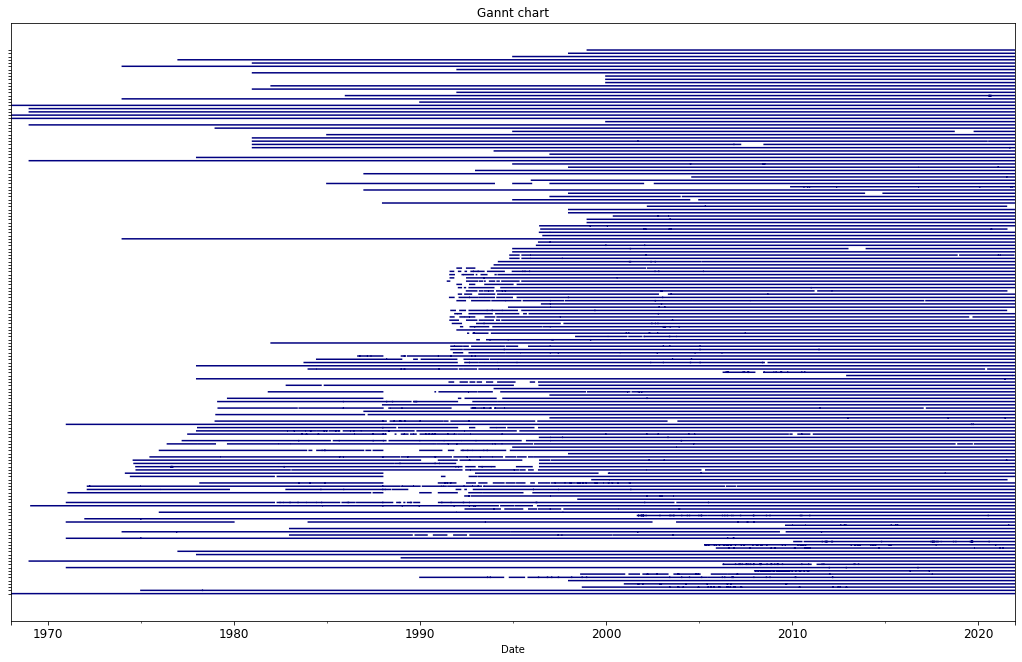

In [7]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_BE, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

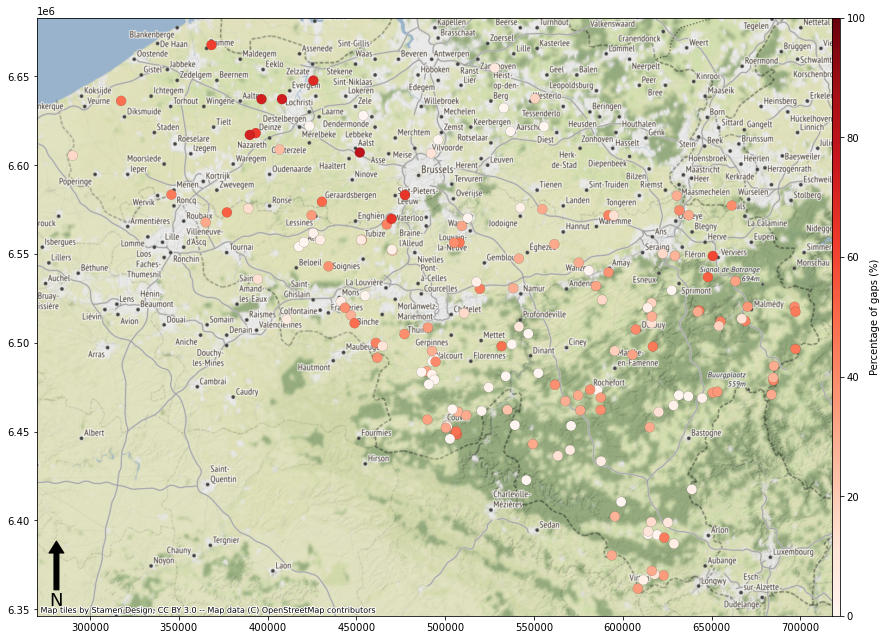

In [8]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

In [9]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps <= 100.0].index.tolist()
len(idcondition)

168

In [10]:
timeseriesfinalcondition = timeseries_BE.loc[:, idcondition]
timeseriesfinalcondition

10461002  19511002  23711002  29521002  29711002  35611002  \
Date                                                                     
1968-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-12-27      2.62      4.47      1.25      1.68      2.83      1.78   
2021-12-28      2.97      5.40      2.16      2.62      3.44      2.25   
2021-12-29      3.68      9.28      3.00      3.41      4.76      2.39   
2021-12-30      2.98      6.75      2.18      2.73      4.13      2.29   
2021-12-31      2.67      5.80      1.86      2.60      4.13      2.03   

            36431002  55721002  57711002  58261002  ...  40000001  40000002  \
Date                                                ...                       
1968-01-01       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-03       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1968-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2021-12-27      2.00      0.57    31.380     42.62  ...     10.38     16.32   
2021-12-28      2.14      0.66    33.921     47.28  ...     14.77     17.54   
2021-12-29      2.33      0.79    31.218     76.80  ...     14.35     41.38   
2021-12-30      2.73      0.67    29.764     86.12  ...     11.61     37.96   
2021-12-31      2.63      0.59    23.569     90.85  ...     10.80     27.75   

            50000000  50000001  57000000  60000000  60000001  70000000  \
Date                                                                     
1968-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1968-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2021-12-27     35.31      6.89     80.10     22.27      5.71      6.43   
2021-12-28     46.23      7.91    108.79     32.47      3.40      9.78   
2021-12-29     47.02     13.27    139.56     50.69      5.63     15.41   
2021-12-30     41.59     12.70     84.11     30.41     -0.28     11.92   
2021-12-31     43.29     11.53     64.91     25.12     -1.32      8.78   

            70000001  70000002  
Date                            
1968-01-01       NaN       NaN  
1968-01-02       NaN       NaN  
1968-01-03       NaN       NaN  
1968-01-04       NaN       NaN  
1968-01-05       NaN       NaN  
...              ...       ...  
2021-12-27     57.06      5.91  
2021-12-28     81.87      6.27  
2021-12-29    104.54      9.62  
2021-12-30     76.09      9.73  
2021-12-31     59.53      9.23  

[19724 rows x 168 columns]

In [11]:
networkfinalcondition = network_BE.loc[idcondition, :]
networkfinalcondition

name                     river   area  elev       lon  \
Code                                                                     
10461002      Bierges                      Dyle  310.0   NaN  4.606129   
19511002       Tubize                     Senne  215.0   NaN  4.196446   
23711002   Ronquieres                     Samme  135.0   NaN  4.224809   
29521002   Irchonwelz           DendreOrientale  126.0   NaN  3.751661   
29711002          Ath           DendreOrientale  229.0   NaN  3.777834   
...               ...                       ...    ...   ...       ...   
60000000  Erembodegem                    Dender    NaN   NaN  4.060017   
60000001      Lembeek  Kanaal Brussel Charleroi    NaN   NaN  4.220223   
70000000      Haringe                     Ijzer    NaN   NaN  2.608001   
70000001    Merendree     Afleidingskanaal Leie    NaN   NaN  3.562876   
70000002  Geel Zammel                Grote Nete    NaN   NaN  4.946106   

                lat country  
Code                         
10461002  50.710583      BE  
19511002  50.690256      BE  
23711002  50.605923      BE  
29521002  50.618903      BE  
29711002  50.633521      BE  
...             ...     ...  
60000000  50.920076      BE  
60000001  50.708053      BE  
70000000  50.910322      BE  
70000001  51.089907      BE  
70000002  51.091761      BE  

[168 rows x 7 columns]

In [26]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_BE.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_BE.xlsx')


2. Czechia:

In [19]:
# Network:
network_CZ = pd.read_csv(r"Julia\timeseries\original\network_CZ.csv")

# Here we clean our dataframe for only the useful columns:
network_CZ = network_CZ[["ID", "STATION", "RIVER", "Area", "Area", "X", "Y"]]

# For Belgium we do not have the elevation information:
network_CZ.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]
network_CZ.elev = np.nan

# Here we assing the country:
network_CZ["country"] = "CZ"

# Here we set the number of algorithms for the code column:
network_CZ.code = network_CZ.code.astype(str).str.zfill(6)

network_CZ.set_index("code", inplace = True)

network_CZ

name       river    area  elev        lon        lat  \
code                                                                      
001000  Špindlerův Mlýn        Labe   53.06   NaN  15.598108  50.723140   
002000           Labská        Labe   61.27   NaN  15.585088  50.710249   
003000         Prosečné   Malé Labe   72.75   NaN  15.694443  50.552152   
003100        Černý Důl       Čistá    6.53   NaN  15.712667  50.649369   
004000         Hostinné       Čistá   77.44   NaN  15.726104  50.541709   
...                 ...         ...     ...   ...        ...        ...   
484000      VD Koryčany     Kyjovka   27.61   NaN  17.189051  49.116826   
486000            Kyjov     Kyjovka  117.49   NaN  17.121205  49.010572   
486500       Osvětimany  Hruškovice    9.54   NaN  17.246798  49.059223   
487000            Popov       Vlára  169.82   NaN  17.970876  49.077326   
487500           Brumov    Brumovka   66.28   NaN  18.021899  49.092848   

       country  
code            
001000      CZ  
002000      CZ  
003000      CZ  
003100      CZ  
004000      CZ  
...        ...  
484000      CZ  
486000      CZ  
486500      CZ  
487000      CZ  
487500      CZ  

[538 rows x 7 columns]

In [20]:
# Time-series:
# Data lecture:
timeseries_CZ = pd.read_csv(r"Julia\timeseries\original\timeseries_CZ.csv", index_col=0)
timeseries_CZ.set_index("DTM", inplace = True)
timeseries_CZ.index.name = "Date"
timeseries_CZ

001000  002000  003000  003100  004000  004200  004300  004500  \
Date                                                                         
1980-11-01     NaN     NaN   0.980     NaN   0.740     NaN   0.850     NaN   
1980-11-02     NaN     NaN   0.980     NaN   0.740     NaN   0.810     NaN   
1980-11-03     NaN     NaN   0.980     NaN   0.740     NaN   0.810     NaN   
1980-11-04     NaN     NaN   0.980     NaN   0.660     NaN   0.810     NaN   
1980-11-05     NaN     NaN   0.980     NaN   0.660     NaN   0.770     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2021-12-27    1.07   0.883   0.998  0.0783   0.922    3.95   0.255   0.359   
2021-12-28    1.07   1.230   0.997  0.0783   0.722    3.73   0.255   0.316   
2021-12-29    1.05   1.400   1.010  0.0829   0.574    3.79   0.248   0.303   
2021-12-30    1.60   1.400   1.400  0.1780   0.688    4.36   0.262   0.610   
2021-12-31    8.04   6.430   6.600  0.9430   4.320   22.70   1.300   2.110   

            006000  008000  ...  477000  478000  480300  480500  483100  \
Date                        ...                                           
1980-11-01    4.54  0.1080  ...    0.49    7.35     NaN     NaN  0.0450   
1980-11-02    4.54  0.1080  ...    0.49    7.38     NaN     NaN  0.0450   
1980-11-03    4.54  0.1080  ...    0.49    6.80     NaN     NaN  0.0450   
1980-11-04    4.54  0.0940  ...    0.49    6.52     NaN     NaN  0.0400   
1980-11-05    4.54  0.0940  ...    0.49    6.42     NaN     NaN  0.0450   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2021-12-27    3.87  0.0471  ...     NaN    5.36   0.320    24.3  0.0382   
2021-12-28    4.49  0.0471  ...     NaN    6.23   0.315    21.9  0.0366   
2021-12-29    4.80  0.0471  ...     NaN    6.47   0.323    19.6  0.0377   
2021-12-30    4.80  0.0684  ...     NaN    6.41   0.352    23.3  0.0420   
2021-12-31   14.10  0.2200  ...     NaN    7.14   0.390    29.8  0.0513   

            484000  486000  486500  487000  487500  
Date                                                
1980-11-01  0.0290   0.160  0.0140   0.594   0.332  
1980-11-02  0.0290   0.160  0.0140   0.576   0.322  
1980-11-03  0.0290   0.170  0.0140   0.501   0.280  
1980-11-04  0.0290   0.180  0.0130   0.512   0.286  
1980-11-05  0.0290   0.170  0.0120   0.582   0.325  
...            ...     ...     ...     ...     ...  
2021-12-27  0.0505   0.115  0.0083   0.587   0.262  
2021-12-28  0.0502   0.115  0.0083   0.520   0.245  
2021-12-29  0.0501   0.123  0.0083   0.523   0.249  
2021-12-30  0.0502   0.127  0.0086   0.619   0.378  
2021-12-31  0.0501   0.135  0.0122   3.230   2.240  

[15036 rows x 538 columns]

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [21]:
network_CZ, timeseries_CZ = geospatialfunctions.new_code_function(network_country_input = network_CZ.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_CZ, 
                                                                name_col_in_network = "code", country = "CZ")

network_CZ

code             name       river    area  elev        lon        lat  \
0    001000  Špindlerův Mlýn        Labe   53.06   NaN  15.598108  50.723140   
1    002000           Labská        Labe   61.27   NaN  15.585088  50.710249   
2    003000         Prosečné   Malé Labe   72.75   NaN  15.694443  50.552152   
3    003100        Černý Důl       Čistá    6.53   NaN  15.712667  50.649369   
4    004000         Hostinné       Čistá   77.44   NaN  15.726104  50.541709   
..      ...              ...         ...     ...   ...        ...        ...   
533  484000      VD Koryčany     Kyjovka   27.61   NaN  17.189051  49.116826   
534  486000            Kyjov     Kyjovka  117.49   NaN  17.121205  49.010572   
535  486500       Osvětimany  Hruškovice    9.54   NaN  17.246798  49.059223   
536  487000            Popov       Vlára  169.82   NaN  17.970876  49.077326   
537  487500           Brumov    Brumovka   66.28   NaN  18.021899  49.092848   

    country new_code  
0        CZ  CZ00001  
1        CZ  CZ00002  
2        CZ  CZ00003  
3        CZ  CZ00004  
4        CZ  CZ00005  
..      ...      ...  
533      CZ  CZ00534  
534      CZ  CZ00535  
535      CZ  CZ00536  
536      CZ  CZ00537  
537      CZ  CZ00538  

[538 rows x 9 columns]

In [22]:
timeseries_CZ

CZ00001  CZ00002  CZ00003  CZ00004  CZ00005  CZ00006  CZ00007  \
Date                                                                        
1980-11-01      NaN      NaN    0.980      NaN    0.740      NaN    0.850   
1980-11-02      NaN      NaN    0.980      NaN    0.740      NaN    0.810   
1980-11-03      NaN      NaN    0.980      NaN    0.740      NaN    0.810   
1980-11-04      NaN      NaN    0.980      NaN    0.660      NaN    0.810   
1980-11-05      NaN      NaN    0.980      NaN    0.660      NaN    0.770   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27     1.07    0.883    0.998   0.0783    0.922     3.95    0.255   
2021-12-28     1.07    1.230    0.997   0.0783    0.722     3.73    0.255   
2021-12-29     1.05    1.400    1.010   0.0829    0.574     3.79    0.248   
2021-12-30     1.60    1.400    1.400   0.1780    0.688     4.36    0.262   
2021-12-31     8.04    6.430    6.600   0.9430    4.320    22.70    1.300   

            CZ00008  CZ00009  CZ00010  ...  CZ00529  CZ00530  CZ00531  \
Date                                   ...                              
1980-11-01      NaN     4.54   0.1080  ...     0.49     7.35      NaN   
1980-11-02      NaN     4.54   0.1080  ...     0.49     7.38      NaN   
1980-11-03      NaN     4.54   0.1080  ...     0.49     6.80      NaN   
1980-11-04      NaN     4.54   0.0940  ...     0.49     6.52      NaN   
1980-11-05      NaN     4.54   0.0940  ...     0.49     6.42      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-27    0.359     3.87   0.0471  ...      NaN     5.36    0.320   
2021-12-28    0.316     4.49   0.0471  ...      NaN     6.23    0.315   
2021-12-29    0.303     4.80   0.0471  ...      NaN     6.47    0.323   
2021-12-30    0.610     4.80   0.0684  ...      NaN     6.41    0.352   
2021-12-31    2.110    14.10   0.2200  ...      NaN     7.14    0.390   

            CZ00532  CZ00533  CZ00534  CZ00535  CZ00536  CZ00537  CZ00538  
Date                                                                       
1980-11-01      NaN   0.0450   0.0290    0.160   0.0140    0.594    0.332  
1980-11-02      NaN   0.0450   0.0290    0.160   0.0140    0.576    0.322  
1980-11-03      NaN   0.0450   0.0290    0.170   0.0140    0.501    0.280  
1980-11-04      NaN   0.0400   0.0290    0.180   0.0130    0.512    0.286  
1980-11-05      NaN   0.0450   0.0290    0.170   0.0120    0.582    0.325  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-27     24.3   0.0382   0.0505    0.115   0.0083    0.587    0.262  
2021-12-28     21.9   0.0366   0.0502    0.115   0.0083    0.520    0.245  
2021-12-29     19.6   0.0377   0.0501    0.123   0.0083    0.523    0.249  
2021-12-30     23.3   0.0420   0.0502    0.127   0.0086    0.619    0.378  
2021-12-31     29.8   0.0513   0.0501    0.135   0.0122    3.230    2.240  

[15036 rows x 538 columns]

In [23]:
# And here we save our original data:
timeseries_CZ.to_csv(r'Julia\timeseries\timeseries_CZo.csv')
network_CZ.to_excel(r'Julia\timeseries\network_CZo.xlsx')

In [33]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_CZ.loc["1981":"2020", :], network_CZ.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                 
001000  15.598108  50.723140   3257.0       22.865768
002000  15.585088  50.710249   1765.0       12.391182
003000  15.694443  50.552152      0.0        0.000000
003100  15.712667  50.649369    304.0        2.134232
004000  15.726104  50.541709    153.0        1.074136
...           ...        ...      ...             ...
484000  17.189051  49.116826      0.0        0.000000
486000  17.121205  49.010572      0.0        0.000000
486500  17.246798  49.059223      0.0        0.000000
487000  17.970876  49.077326      0.0        0.000000
487500  18.021899  49.092848      0.0        0.000000

[538 rows x 4 columns]

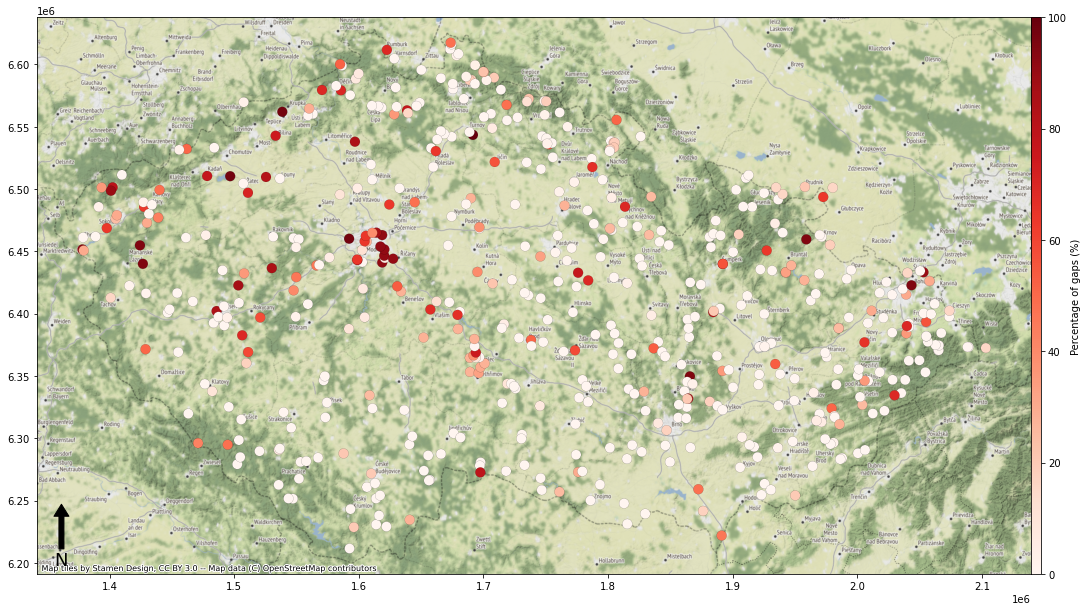

In [34]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

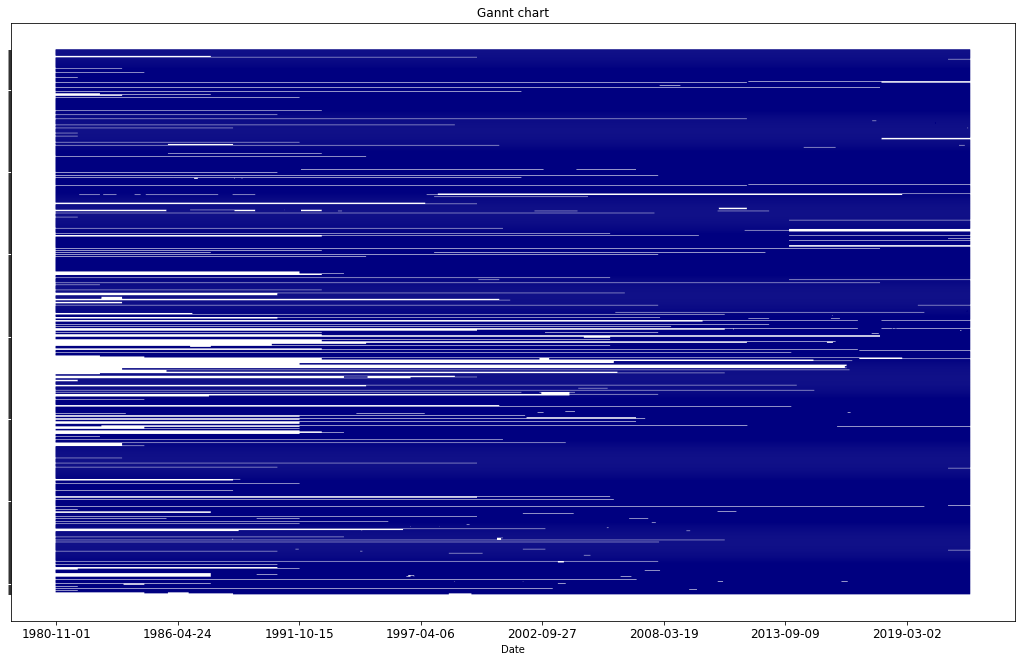

In [35]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_CZ, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

In [36]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

465

In [37]:
timeseriesfinalcondition = timeseries_CZ.loc[:, idcondition]
timeseriesfinalcondition

001000  002000  003000  003100  004000  004300  004500  006000  \
Date                                                                         
1980-11-01     NaN     NaN   0.980     NaN   0.740   0.850     NaN    4.54   
1980-11-02     NaN     NaN   0.980     NaN   0.740   0.810     NaN    4.54   
1980-11-03     NaN     NaN   0.980     NaN   0.740   0.810     NaN    4.54   
1980-11-04     NaN     NaN   0.980     NaN   0.660   0.810     NaN    4.54   
1980-11-05     NaN     NaN   0.980     NaN   0.660   0.770     NaN    4.54   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2021-12-27    1.07   0.883   0.998  0.0783   0.922   0.255   0.359    3.87   
2021-12-28    1.07   1.230   0.997  0.0783   0.722   0.255   0.316    4.49   
2021-12-29    1.05   1.400   1.010  0.0829   0.574   0.248   0.303    4.80   
2021-12-30    1.60   1.400   1.400  0.1780   0.688   0.262   0.610    4.80   
2021-12-31    8.04   6.430   6.600  0.9430   4.320   1.300   2.110   14.10   

            008000  009000  ...  477000  478000  480300  480500  483100  \
Date                        ...                                           
1980-11-01  0.1080     NaN  ...    0.49    7.35     NaN     NaN  0.0450   
1980-11-02  0.1080     NaN  ...    0.49    7.38     NaN     NaN  0.0450   
1980-11-03  0.1080     NaN  ...    0.49    6.80     NaN     NaN  0.0450   
1980-11-04  0.0940     NaN  ...    0.49    6.52     NaN     NaN  0.0400   
1980-11-05  0.0940     NaN  ...    0.49    6.42     NaN     NaN  0.0450   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2021-12-27  0.0471  0.0861  ...     NaN    5.36   0.320    24.3  0.0382   
2021-12-28  0.0471  0.0861  ...     NaN    6.23   0.315    21.9  0.0366   
2021-12-29  0.0471  0.0861  ...     NaN    6.47   0.323    19.6  0.0377   
2021-12-30  0.0684  0.1290  ...     NaN    6.41   0.352    23.3  0.0420   
2021-12-31  0.2200  0.8150  ...     NaN    7.14   0.390    29.8  0.0513   

            484000  486000  486500  487000  487500  
Date                                                
1980-11-01  0.0290   0.160  0.0140   0.594   0.332  
1980-11-02  0.0290   0.160  0.0140   0.576   0.322  
1980-11-03  0.0290   0.170  0.0140   0.501   0.280  
1980-11-04  0.0290   0.180  0.0130   0.512   0.286  
1980-11-05  0.0290   0.170  0.0120   0.582   0.325  
...            ...     ...     ...     ...     ...  
2021-12-27  0.0505   0.115  0.0083   0.587   0.262  
2021-12-28  0.0502   0.115  0.0083   0.520   0.245  
2021-12-29  0.0501   0.123  0.0083   0.523   0.249  
2021-12-30  0.0502   0.127  0.0086   0.619   0.378  
2021-12-31  0.0501   0.135  0.0122   3.230   2.240  

[15036 rows x 465 columns]

In [38]:
networkfinalcondition = network_CZ.loc[idcondition, :]
networkfinalcondition

name       river    area  elev        lon        lat  \
Code                                                                      
001000  Špindlerův Mlýn        Labe   53.06   NaN  15.598108  50.723140   
002000           Labská        Labe   61.27   NaN  15.585088  50.710249   
003000         Prosečné   Malé Labe   72.75   NaN  15.694443  50.552152   
003100        Černý Důl       Čistá    6.53   NaN  15.712667  50.649369   
004000         Hostinné       Čistá   77.44   NaN  15.726104  50.541709   
...                 ...         ...     ...   ...        ...        ...   
484000      VD Koryčany     Kyjovka   27.61   NaN  17.189051  49.116826   
486000            Kyjov     Kyjovka  117.49   NaN  17.121205  49.010572   
486500       Osvětimany  Hruškovice    9.54   NaN  17.246798  49.059223   
487000            Popov       Vlára  169.82   NaN  17.970876  49.077326   
487500           Brumov    Brumovka   66.28   NaN  18.021899  49.092848   

       country  
Code            
001000      CZ  
002000      CZ  
003000      CZ  
003100      CZ  
004000      CZ  
...        ...  
484000      CZ  
486000      CZ  
486500      CZ  
487000      CZ  
487500      CZ  

[465 rows x 7 columns]

In [39]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_CZ.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_CZ.xlsx')


3. Denmark:

In [66]:
# Network:
network_DK = pd.read_csv(r"Julia\timeseries\original\network_DK.csv")

# Here we convert to 4326:
crs={'init':"epsg:25832"}
geometry=[Point(xy) for xy in zip(network_DK.PositionX, network_DK.PositionY)]
geodata=gpd.GeoDataFrame(network_DK,crs=crs, geometry=geometry)

network_DK = geodata.to_crs(epsg = 4326)
network_DK['coord_x'] = network_DK.centroid.x  
network_DK['coord_y'] = network_DK.centroid.y

network_DK.drop(["geometry"], axis = 1, inplace = True)

# Here we clean our dataframe for only the useful columns:
network_DK = network_DK[["ID", "Name", "Name", "PositionX", "PositionX", "coord_x", "coord_y"]]

# For Belgium we do not have the elevation information:
network_DK.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]

network_DK.area = np.nan
network_DK.elev = np.nan

# Here we assing the country:
network_DK["country"] = "DK"

network_DK.set_index("code", inplace = True)

network_DK

name  \
code                                                           
e3db7850-9c76-498d-bfd7-7da5d35ba32a                  Gudenå   
fddb45ef-0680-4d20-beab-c74715d9ba5f   Arreskov Sø, Tilløb 4   
fde3d0da-1ead-4eb9-9009-cfe286a95b25       Søbo Sø, Tilløb 3   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19                  Hove Å   
fe20e861-1efd-4df2-aec0-cfbcd7494b59                Holtum Å   
...                                                      ...   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35             Nimdrup Bæk   
fce63ce5-df58-49e7-9f46-26ac2456e3b1                  Døde Å   
fd179f17-d204-4539-ba69-4539e28b89c7  Gråsten Slotssø, Afløb   
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4   Hvidkilde Sø, Afløb 1   
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad             Afløb Kulsø   

                                                       river  area  elev  \
code                                                                       
e3db7850-9c76-498d-bfd7-7da5d35ba32a                  Gudenå   NaN   NaN   
fddb45ef-0680-4d20-beab-c74715d9ba5f   Arreskov Sø, Tilløb 4   NaN   NaN   
fde3d0da-1ead-4eb9-9009-cfe286a95b25       Søbo Sø, Tilløb 3   NaN   NaN   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19                  Hove Å   NaN   NaN   
fe20e861-1efd-4df2-aec0-cfbcd7494b59                Holtum Å   NaN   NaN   
...                                                      ...   ...   ...   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35             Nimdrup Bæk   NaN   NaN   
fce63ce5-df58-49e7-9f46-26ac2456e3b1                  Døde Å   NaN   NaN   
fd179f17-d204-4539-ba69-4539e28b89c7  Gråsten Slotssø, Afløb   NaN   NaN   
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4   Hvidkilde Sø, Afløb 1   NaN   NaN   
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad             Afløb Kulsø   NaN   NaN   

                                            lon        lat country  
code                                                                
e3db7850-9c76-498d-bfd7-7da5d35ba32a   9.670460  56.240264      DK  
fddb45ef-0680-4d20-beab-c74715d9ba5f  10.290896  55.147061      DK  
fde3d0da-1ead-4eb9-9009-cfe286a95b25  10.204787  55.203975      DK  
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  12.136257  55.727224      DK  
fe20e861-1efd-4df2-aec0-cfbcd7494b59   9.056961  55.984249      DK  
...                                         ...        ...     ...  
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35   9.542638  56.009080      DK  
fce63ce5-df58-49e7-9f46-26ac2456e3b1  10.137365  56.129407      DK  
fd179f17-d204-4539-ba69-4539e28b89c7   9.596856  54.923907      DK  
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4  10.531329  55.072971      DK  
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad   8.722850  56.002720      DK  

[907 rows x 7 columns]

In [64]:
# Time-series:
# Data lecture:
timeseries_DK = pd.read_excel(r"Julia\timeseries\original\timeseries_DK.xlsx", index_col=0)
timeseries_DK.set_index("Time", inplace = True)
timeseries_DK.index.name = "Date"
timeseries_DK

e3db7850-9c76-498d-bfd7-7da5d35ba32a  \
Date                                               
1917-01-01                             26.700000   
1917-01-02                             29.100000   
1917-01-03                             31.500000   
1917-01-04                             33.000000   
1917-01-05                             33.000000   
...                                          ...   
2021-12-27                             19.302094   
2021-12-28                             19.089404   
2021-12-29                             18.511181   
2021-12-30                             18.277375   
2021-12-31                             18.660029   

            fddb45ef-0680-4d20-beab-c74715d9ba5f  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                                   NaN   
2021-12-28                                   NaN   
2021-12-29                                   NaN   
2021-12-30                                   NaN   
2021-12-31                                   NaN   

            fde3d0da-1ead-4eb9-9009-cfe286a95b25  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                                   NaN   
2021-12-28                                   NaN   
2021-12-29                                   NaN   
2021-12-30                                   NaN   
2021-12-31                                   NaN   

            fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              0.305794   
2021-12-28                              0.301879   
2021-12-29                              0.296157   
2021-12-30                              0.295163   
2021-12-31                              0.331138   

            fe20e861-1efd-4df2-aec0-cfbcd7494b59  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              2.705285   
2021-12-28                              2.703042   
2021-12-29                              2.748033   
2021-12-30                              2.868984   
2021-12-31                              3.248903   

            ff8f7411-0de6-4f03-b267-6b246b1fb8b5  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                                   NaN   
2021-12-28                                   NaN   
2021-12-29                                   NaN   
2021-12-30                                   NaN   
202

In [31]:
#timeseries_DK.loc[:, "fd179f17-d204-4539-ba69-4539e28b89c7"].plot()

In [68]:
timeseries_DK.drop('03bbd61b-ca23-4efa-899d-449444472b21', axis = 1, inplace = True) 
timeseries_DK

e3db7850-9c76-498d-bfd7-7da5d35ba32a  \
Date                                               
1917-01-01                             26.700000   
1917-01-02                             29.100000   
1917-01-03                             31.500000   
1917-01-04                             33.000000   
1917-01-05                             33.000000   
...                                          ...   
2021-12-27                             19.302094   
2021-12-28                             19.089404   
2021-12-29                             18.511181   
2021-12-30                             18.277375   
2021-12-31                             18.660029   

            fddb45ef-0680-4d20-beab-c74715d9ba5f  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                                   NaN   
2021-12-28                                   NaN   
2021-12-29                                   NaN   
2021-12-30                                   NaN   
2021-12-31                                   NaN   

            fde3d0da-1ead-4eb9-9009-cfe286a95b25  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                                   NaN   
2021-12-28                                   NaN   
2021-12-29                                   NaN   
2021-12-30                                   NaN   
2021-12-31                                   NaN   

            fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              0.305794   
2021-12-28                              0.301879   
2021-12-29                              0.296157   
2021-12-30                              0.295163   
2021-12-31                              0.331138   

            fe20e861-1efd-4df2-aec0-cfbcd7494b59  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              2.705285   
2021-12-28                              2.703042   
2021-12-29                              2.748033   
2021-12-30                              2.868984   
2021-12-31                              3.248903   

            ff8f7411-0de6-4f03-b267-6b246b1fb8b5  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                                   NaN   
2021-12-28                                   NaN   
2021-12-29                                   NaN   
2021-12-30                                   NaN   
202

In [69]:
network_DK = network_DK.loc[timeseries_DK.columns, :]

network_DK.index.name = "code"
network_DK

name  \
code                                                           
e3db7850-9c76-498d-bfd7-7da5d35ba32a                  Gudenå   
fddb45ef-0680-4d20-beab-c74715d9ba5f   Arreskov Sø, Tilløb 4   
fde3d0da-1ead-4eb9-9009-cfe286a95b25       Søbo Sø, Tilløb 3   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19                  Hove Å   
fe20e861-1efd-4df2-aec0-cfbcd7494b59                Holtum Å   
...                                                      ...   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35             Nimdrup Bæk   
fce63ce5-df58-49e7-9f46-26ac2456e3b1                  Døde Å   
fd179f17-d204-4539-ba69-4539e28b89c7  Gråsten Slotssø, Afløb   
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4   Hvidkilde Sø, Afløb 1   
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad             Afløb Kulsø   

                                                       river  area  elev  \
code                                                                       
e3db7850-9c76-498d-bfd7-7da5d35ba32a                  Gudenå   NaN   NaN   
fddb45ef-0680-4d20-beab-c74715d9ba5f   Arreskov Sø, Tilløb 4   NaN   NaN   
fde3d0da-1ead-4eb9-9009-cfe286a95b25       Søbo Sø, Tilløb 3   NaN   NaN   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19                  Hove Å   NaN   NaN   
fe20e861-1efd-4df2-aec0-cfbcd7494b59                Holtum Å   NaN   NaN   
...                                                      ...   ...   ...   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35             Nimdrup Bæk   NaN   NaN   
fce63ce5-df58-49e7-9f46-26ac2456e3b1                  Døde Å   NaN   NaN   
fd179f17-d204-4539-ba69-4539e28b89c7  Gråsten Slotssø, Afløb   NaN   NaN   
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4   Hvidkilde Sø, Afløb 1   NaN   NaN   
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad             Afløb Kulsø   NaN   NaN   

                                            lon        lat country  
code                                                                
e3db7850-9c76-498d-bfd7-7da5d35ba32a   9.670460  56.240264      DK  
fddb45ef-0680-4d20-beab-c74715d9ba5f  10.290896  55.147061      DK  
fde3d0da-1ead-4eb9-9009-cfe286a95b25  10.204787  55.203975      DK  
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  12.136257  55.727224      DK  
fe20e861-1efd-4df2-aec0-cfbcd7494b59   9.056961  55.984249      DK  
...                                         ...        ...     ...  
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35   9.542638  56.009080      DK  
fce63ce5-df58-49e7-9f46-26ac2456e3b1  10.137365  56.129407      DK  
fd179f17-d204-4539-ba69-4539e28b89c7   9.596856  54.923907      DK  
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4  10.531329  55.072971      DK  
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad   8.722850  56.002720      DK  

[907 rows x 7 columns]

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [70]:
network_DK, timeseries_DK = geospatialfunctions.new_code_function(network_country_input = network_DK.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_DK, 
                                                                name_col_in_network = "code", country = "DK")

network_DK

code                    name  \
0    e3db7850-9c76-498d-bfd7-7da5d35ba32a                  Gudenå   
1    fddb45ef-0680-4d20-beab-c74715d9ba5f   Arreskov Sø, Tilløb 4   
2    fde3d0da-1ead-4eb9-9009-cfe286a95b25       Søbo Sø, Tilløb 3   
3    fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19                  Hove Å   
4    fe20e861-1efd-4df2-aec0-cfbcd7494b59                Holtum Å   
..                                    ...                     ...   
902  fce7a3e3-71f8-4df5-9e54-e2e490c2ae35             Nimdrup Bæk   
903  fce63ce5-df58-49e7-9f46-26ac2456e3b1                  Døde Å   
904  fd179f17-d204-4539-ba69-4539e28b89c7  Gråsten Slotssø, Afløb   
905  fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4   Hvidkilde Sø, Afløb 1   
906  fdcd2fc4-bdae-46d6-b2c3-7be1647115ad             Afløb Kulsø   

                      river  area  elev        lon        lat country new_code  
0                    Gudenå   NaN   NaN   9.670460  56.240264      DK  DK00001  
1     Arreskov Sø, Tilløb 4   NaN   NaN  10.290896  55.147061      DK  DK00002  
2         Søbo Sø, Tilløb 3   NaN   NaN  10.204787  55.203975      DK  DK00003  
3                    Hove Å   NaN   NaN  12.136257  55.727224      DK  DK00004  
4                  Holtum Å   NaN   NaN   9.056961  55.984249      DK  DK00005  
..                      ...   ...   ...        ...        ...     ...      ...  
902             Nimdrup Bæk   NaN   NaN   9.542638  56.009080      DK  DK00903  
903                  Døde Å   NaN   NaN  10.137365  56.129407      DK  DK00904  
904  Gråsten Slotssø, Afløb   NaN   NaN   9.596856  54.923907      DK  DK00905  
905   Hvidkilde Sø, Afløb 1   NaN   NaN  10.531329  55.072971      DK  DK00906  
906             Afløb Kulsø   NaN   NaN   8.722850  56.002720      DK  DK00907  

[907 rows x 9 columns]

In [71]:
timeseries_DK

DK00001  DK00002  DK00003   DK00004   DK00005  DK00006  \
Date                                                                   
1917-01-01  26.700000      NaN      NaN       NaN       NaN      NaN   
1917-01-02  29.100000      NaN      NaN       NaN       NaN      NaN   
1917-01-03  31.500000      NaN      NaN       NaN       NaN      NaN   
1917-01-04  33.000000      NaN      NaN       NaN       NaN      NaN   
1917-01-05  33.000000      NaN      NaN       NaN       NaN      NaN   
...               ...      ...      ...       ...       ...      ...   
2021-12-27  19.302094      NaN      NaN  0.305794  2.705285      NaN   
2021-12-28  19.089404      NaN      NaN  0.301879  2.703042      NaN   
2021-12-29  18.511181      NaN      NaN  0.296157  2.748033      NaN   
2021-12-30  18.277375      NaN      NaN  0.295163  2.868984      NaN   
2021-12-31  18.660029      NaN      NaN  0.331138  3.248903      NaN   

             DK00007  DK00008   DK00009  DK00010  ...   DK00898  DK00899  \
Date                                              ...                      
1917-01-01       NaN      NaN       NaN      NaN  ...       NaN      NaN   
1917-01-02       NaN      NaN       NaN      NaN  ...       NaN      NaN   
1917-01-03       NaN      NaN       NaN      NaN  ...       NaN      NaN   
1917-01-04       NaN      NaN       NaN      NaN  ...       NaN      NaN   
1917-01-05       NaN      NaN       NaN      NaN  ...       NaN      NaN   
...              ...      ...       ...      ...  ...       ...      ...   
2021-12-27  0.067523      NaN  0.050229      NaN  ...  3.213314      NaN   
2021-12-28  0.067260      NaN  0.055989      NaN  ...  3.181656      NaN   
2021-12-29  0.064105      NaN  0.055354      NaN  ...  3.227352      NaN   
2021-12-30  0.064068      NaN  0.065489      NaN  ...  3.445019      NaN   
2021-12-31  0.111635      NaN  0.090283      NaN  ...  3.676128      NaN   

            DK00900  DK00901   DK00902   DK00903  DK00904  DK00905  DK00906  \
Date                                                                          
1917-01-01      NaN      NaN       NaN       NaN      NaN      NaN      NaN   
1917-01-02      NaN      NaN       NaN       NaN      NaN      NaN      NaN   
1917-01-03      NaN      NaN       NaN       NaN      NaN      NaN      NaN   
1917-01-04      NaN      NaN       NaN       NaN      NaN      NaN      NaN   
1917-01-05      NaN      NaN       NaN       NaN      NaN      NaN      NaN   
...             ...      ...       ...       ...      ...      ...      ...   
2021-12-27      NaN      NaN  0.153616  0.167149      NaN      NaN      NaN   
2021-12-28      NaN      NaN  0.163021  0.162410      NaN      NaN      NaN   
2021-12-29      NaN      NaN  0.158589  0.157146      NaN      NaN      NaN   
2021-12-30      NaN      NaN  0.157846  0.170324      NaN      NaN      NaN   
2021-12-31      NaN      NaN  0.311254  0.232097      NaN      NaN      NaN   

            DK00907  
Date                 
1917-01-01      NaN  
1917-01-02      NaN  
1917-01-03      NaN  
1917-01-04      NaN  
1917-01-05      NaN  
...             ...  
2021-12-27      NaN  
2021-12-28      NaN  
2021-12-29      NaN  
2021-12-30      NaN  
2021-12-31      NaN  

[38351 rows x 907 columns]

<AxesSubplot:xlabel='Date'>

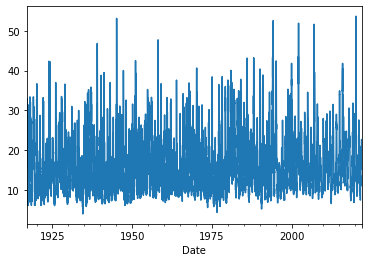

In [72]:
timeseries_DK.loc[:, "DK00001"].plot()

In [101]:
# Check if any column name is NaN
if any(pd.isna(column) for column in timeseries_DK.columns):
    nan_column_names = [column for column in timeseries_DK.columns if pd.isna(column)]
    print("Columns with NaN names:", nan_column_names)
else:
    print("No columns with NaN names.")

No columns with NaN names.


In [74]:
# And here we save our original data:
timeseries_DK.to_csv(r'Julia\timeseries\timeseries_DKo.csv')
network_DK.to_excel(r'Julia\timeseries\network_DKo.xlsx')

* Here we start our gap analysis part:

In [45]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_DK.loc["1981":"2020", :], network_DK.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX     CoordY  NumGaps  \
Code                                                                  
e3db7850-9c76-498d-bfd7-7da5d35ba32a   9.670460  56.240264      0.0   
fddb45ef-0680-4d20-beab-c74715d9ba5f  10.290896  55.147061   8765.0   
fde3d0da-1ead-4eb9-9009-cfe286a95b25  10.204787  55.203975  14245.0   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  12.136257  55.727224     33.0   
fe20e861-1efd-4df2-aec0-cfbcd7494b59   9.056961  55.984249  13138.0   
...                                         ...        ...      ...   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35   9.542638  56.009080   5119.0   
fce63ce5-df58-49e7-9f46-26ac2456e3b1  10.137365  56.129407  14245.0   
fd179f17-d204-4539-ba69-4539e28b89c7   9.596856  54.923907  14244.0   
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4  10.531329  55.072971  14204.0   
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad   8.722850  56.002720  14244.0   

                                      PercentageGaps  
Code                                                  
e3db7850-9c76-498d-bfd7-7da5d35ba32a        0.000000  
fddb45ef-0680-4d20-beab-c74715d9ba5f       59.993155  
fde3d0da-1ead-4eb9-9009-cfe286a95b25       97.501711  
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19        0.225873  
fe20e861-1efd-4df2-aec0-cfbcd7494b59       89.924709  
...                                              ...  
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35       35.037645  
fce63ce5-df58-49e7-9f46-26ac2456e3b1       97.501711  
fd179f17-d204-4539-ba69-4539e28b89c7       97.494867  
fdc6dd5a-dde7-41cd-b8e4-cdc5745831b4       97.221081  
fdcd2fc4-bdae-46d6-b2c3-7be1647115ad       97.494867  

[907 rows x 4 columns]

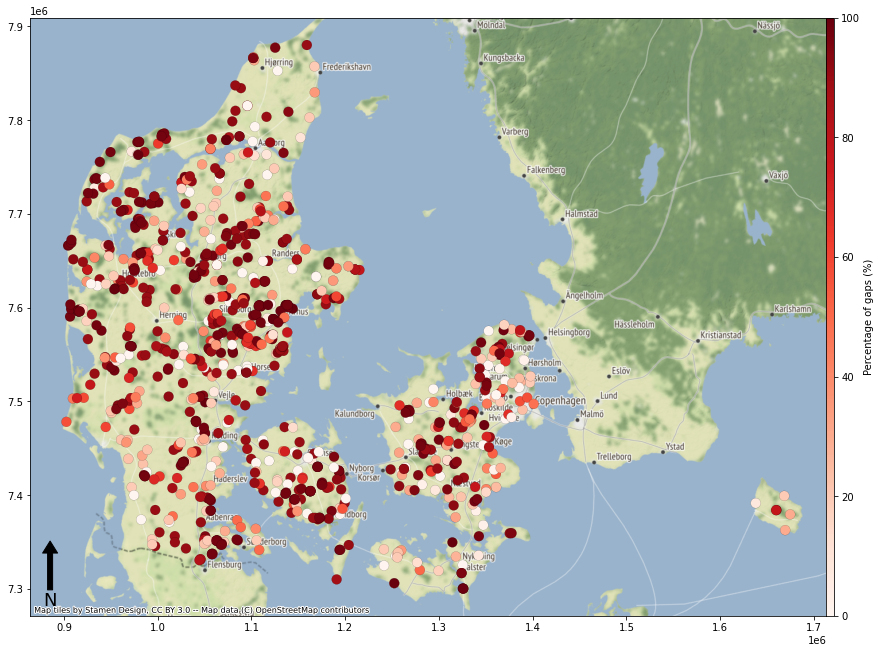

In [46]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

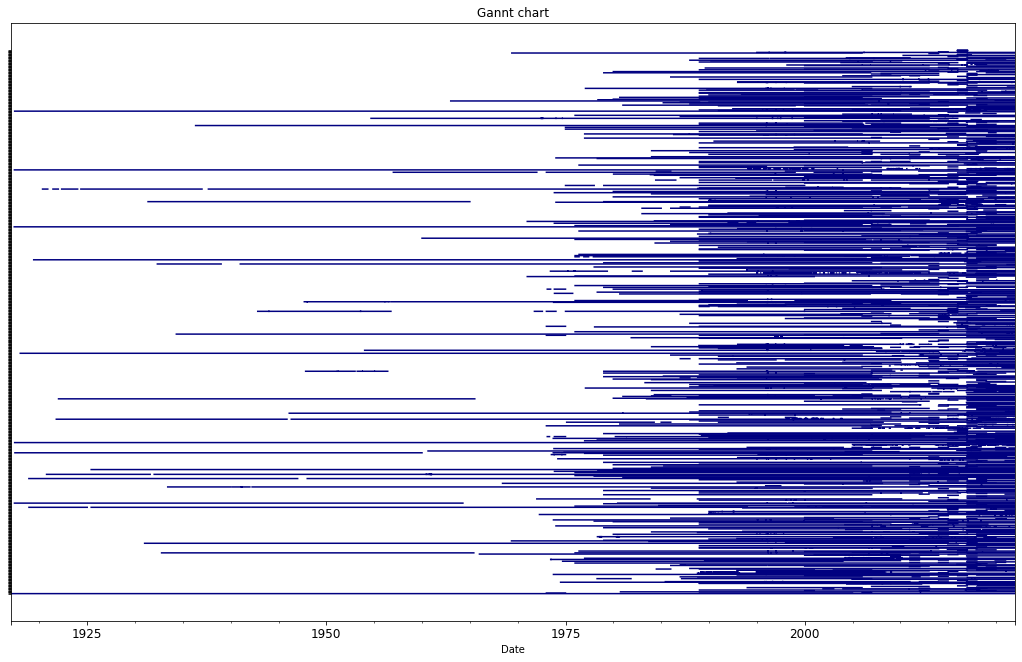

In [47]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_DK, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

In [48]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

310

In [51]:
timeseriesfinalcondition = timeseries_DK.loc[:, idcondition]
timeseriesfinalcondition

e3db7850-9c76-498d-bfd7-7da5d35ba32a  \
Date                                               
1917-01-01                             26.700000   
1917-01-02                             29.100000   
1917-01-03                             31.500000   
1917-01-04                             33.000000   
1917-01-05                             33.000000   
...                                          ...   
2021-12-27                             19.302094   
2021-12-28                             19.089404   
2021-12-29                             18.511181   
2021-12-30                             18.277375   
2021-12-31                             18.660029   

            fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              0.305794   
2021-12-28                              0.301879   
2021-12-29                              0.296157   
2021-12-30                              0.295163   
2021-12-31                              0.331138   

            ff273b9d-1563-4e75-9c3b-c473abd0bf7c  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              0.067523   
2021-12-28                              0.067260   
2021-12-29                              0.064105   
2021-12-30                              0.064068   
2021-12-31                              0.111635   

            0c788d8c-abc2-4a1b-aa2a-8fa5a7630f5f  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              0.693251   
2021-12-28                              0.457197   
2021-12-29                              0.441402   
2021-12-30                              0.476029   
2021-12-31                              0.751181   

            0cd1bb68-824d-42a4-98ee-923e04320101  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              0.052695   
2021-12-28                              0.066949   
2021-12-29                              0.194437   
2021-12-30                              0.337476   
2021-12-31                              1.026629   

            0ce4a69c-d614-4489-9adf-4ce48bde66c8  \
Date                                               
1917-01-01                                   NaN   
1917-01-02                                   NaN   
1917-01-03                                   NaN   
1917-01-04                                   NaN   
1917-01-05                                   NaN   
...                                          ...   
2021-12-27                              1.151449   
2021-12-28                              1.149633   
2021-12-29                              1.167038   
2021-12-30                              1.507459   
202

In [52]:
networkfinalcondition = network_DK.loc[idcondition, :]
networkfinalcondition

name  \
Code                                                        
e3db7850-9c76-498d-bfd7-7da5d35ba32a               Gudenå   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19               Hove Å   
ff273b9d-1563-4e75-9c3b-c473abd0bf7c        Højvads Rende   
0c788d8c-abc2-4a1b-aa2a-8fa5a7630f5f               Mølleå   
0cd1bb68-824d-42a4-98ee-923e04320101              Fiskbæk   
...                                                   ...   
f69b2460-128a-4630-8754-24ff05bf40c3            Hevring Å   
f286c569-6d11-4337-aec5-a50a958a33e3               Idom Å   
f9962c3c-56f0-49f3-99ff-3459980563a7  Lyby-Grønning Grøft   
fcc36f91-aebf-4242-95f1-36e212979c33              Krogbæk   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35          Nimdrup Bæk   

                                                    river  area  elev  \
Code                                                                    
e3db7850-9c76-498d-bfd7-7da5d35ba32a               Gudenå   NaN   NaN   
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19               Hove Å   NaN   NaN   
ff273b9d-1563-4e75-9c3b-c473abd0bf7c        Højvads Rende   NaN   NaN   
0c788d8c-abc2-4a1b-aa2a-8fa5a7630f5f               Mølleå   NaN   NaN   
0cd1bb68-824d-42a4-98ee-923e04320101              Fiskbæk   NaN   NaN   
...                                                   ...   ...   ...   
f69b2460-128a-4630-8754-24ff05bf40c3            Hevring Å   NaN   NaN   
f286c569-6d11-4337-aec5-a50a958a33e3               Idom Å   NaN   NaN   
f9962c3c-56f0-49f3-99ff-3459980563a7  Lyby-Grønning Grøft   NaN   NaN   
fcc36f91-aebf-4242-95f1-36e212979c33              Krogbæk   NaN   NaN   
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35          Nimdrup Bæk   NaN   NaN   

                                            lon        lat country  
Code                                                                
e3db7850-9c76-498d-bfd7-7da5d35ba32a   9.670460  56.240264      DK  
fe3cf6a6-88de-42cc-b6d5-e7eaa2b9ea19  12.136257  55.727224      DK  
ff273b9d-1563-4e75-9c3b-c473abd0bf7c  11.285800  54.867108      DK  
0c788d8c-abc2-4a1b-aa2a-8fa5a7630f5f  12.550076  55.807206      DK  
0cd1bb68-824d-42a4-98ee-923e04320101   9.619363  54.938560      DK  
...                                         ...        ...     ...  
f69b2460-128a-4630-8754-24ff05bf40c3  10.398854  56.518724      DK  
f286c569-6d11-4337-aec5-a50a958a33e3   8.487385  56.334261      DK  
f9962c3c-56f0-49f3-99ff-3459980563a7   9.042915  56.641254      DK  
fcc36f91-aebf-4242-95f1-36e212979c33  12.269292  55.344579      DK  
fce7a3e3-71f8-4df5-9e54-e2e490c2ae35   9.542638  56.009080      DK  

[310 rows x 7 columns]

In [53]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_DK.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_DK.xlsx')


#### 4. Finland:

In [40]:
# 10. Finland:
network_FI = pd.read_csv(r"Julia\timeseries\original\network_FI.csv")

# Here we clean our dataframe for only the useful columns:
network_FI = network_FI[["Number", "Name", "Watershed", "Area (km2)", "X", "X", "Y", "Lake percentage (%)"]]

# For Belgium we do not have the elevation information:
network_FI.columns = ["code", "name", "river", "area", "elev", "lon", "lat", "lake"]

network_FI.elev = np.nan

# Here we set the number of algorithms for the code column:
network_FI.code = network_FI.code.astype(str).str.zfill(7)

# Here we assing the country:
network_FI["country"] = "FI"

# Here we set the code column as the index:
network_FI.set_index("code", inplace = True)

network_FI

name                   river     area  \
code                                                                         
0300250                         Juankoski            Hiitolanjoki    813.0   
0300450                       Kangaskoski            Hiitolanjoki   1035.0   
0410410                  Kuolimo - luusua                  Vuoksi    864.0   
0411200                    Vuoksi, Imatra                  Vuoksi  61071.0   
0411450              Vuoksi, Tainionkoski                  Vuoksi  61061.0   
...                                   ...                     ...      ...   
7300350                        Myllykoski               Koutajoki    734.0   
7400200                 Muojärvi - luusua             Vienan Kemi    870.0   
7401000                 Muojärvi - luusua             Vienan Kemi    870.0   
8400800  Haapajärven tekojärven juoksutus  Perämeren rannikkoalue      NaN   
8400900                         Pattijoki  Perämeren rannikkoalue      NaN   

         elev        lon        lat  lake country  
code                                               
0300250   NaN  29.342999  61.434885  17.3      FI  
0300450   NaN  29.402672  61.411670  17.8      FI  
0410410   NaN  27.700825  61.271730  23.0      FI  
0411200   NaN  28.783807  61.210601  20.0      FI  
0411450   NaN  28.783904  61.210672  20.0      FI  
...       ...        ...        ...   ...     ...  
7300350   NaN  29.555404  66.156084  14.5      FI  
7400200   NaN  29.795592  65.897032  22.2      FI  
7401000   NaN  29.956606  65.871726  22.0      FI  
8400800   NaN  24.495189  64.607670   NaN      FI  
8400900   NaN  24.581015  64.688532   NaN      FI  

[670 rows x 8 columns]

In [41]:
# Time-series:
# Data lecture:
timeseries_FI = pd.read_excel(r"Julia\timeseries\original\timeseries_FI.xlsx", index_col=0)

# Here we adjust our columns names:
timeseries_FI.columns = [col.split('_')[0] for col in timeseries_FI.columns]

# Identify duplicate columns
duplicate_columns = timeseries_FI.columns[timeseries_FI.columns.duplicated(keep='first')]

# Remove duplicate columns
timeseries_FI = timeseries_FI.drop(columns=duplicate_columns)

timeseries_FI

5902650  5902700  6000110  6100614  6100620  6502400  6502500  \
Date                                                                        
1900-01-01      NaN     81.0      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN     81.0      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN     81.0      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN     79.0      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN     76.0      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-04-27    70.33      NaN     5.57      NaN    14.14    18.96      NaN   
2023-04-28   112.23      NaN     7.38      NaN    16.63    22.63      NaN   
2023-04-29    72.26      NaN    10.55      NaN    22.51    28.33      NaN   
2023-04-30    62.68      NaN    13.44      NaN    29.01    34.03      NaN   
2023-05-01    94.86      NaN    15.70      NaN    34.81    40.26      NaN   

            6502550  6503000  6503200  ...  6502010  6502011  6502050  \
Date                                   ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-04-27    35.67     2.80    38.32  ...      NaN      NaN   240.38   
2023-04-28    39.13     2.92    38.18  ...      NaN      NaN   311.21   
2023-04-29    54.48     3.13    39.52  ...      NaN      NaN   305.09   
2023-04-30    52.17     3.36    40.23  ...      NaN      NaN   304.13   
2023-05-01    64.33     3.42    42.36  ...      NaN      NaN   340.67   

            6502130  6502140  6502150  6502151  6502200  6502250  6502350  
Date                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-04-27     0.04     3.30   250.17     7.31      NaN   264.38      NaN  
2023-04-28     0.04     3.21   318.33    11.62      NaN   344.01      NaN  
2023-04-29     0.04     3.26   307.66     6.04      NaN   342.63      NaN  
2023-04-30     0.04     3.27   315.69     0.00      NaN   329.58      NaN  
2023-05-01     0.04     3.36   346.33     2.86      NaN   362.09      NaN  

[32172 rows x 669 columns]

<AxesSubplot:xlabel='Date'>

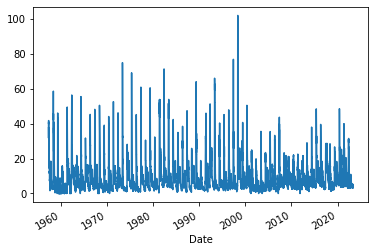

In [55]:
timeseries_FI.loc[:, "7300350"].plot()

In [54]:
network_FI = network_FI.loc[timeseries_FI.columns, :]

network_FI.index.name = "code"
network_FI

name          river     area  elev        lon  \
code                                                                         
5902650     Nuasjärvi, Koivukoski       Oulujoki   7475.0   NaN  27.736529   
5902700        Nuasjärvi - luusua       Oulujoki   7475.0   NaN  27.736529   
6000110  Iso Puutiojärvi - luusua  Kiiminginjoki    371.0   NaN  27.595146   
6100614    Näljänkäjärvi - luusua         Iijoki    280.0   NaN  28.340834   
6100620       Suolijärvi - luusua         Iijoki   1313.0   NaN  28.069000   
...                           ...            ...      ...   ...        ...   
6502150               Pirttikoski       Kemijoki  27703.0   NaN  27.155087   
6502151      Juotas, konevirtaama       Kemijoki    400.0   NaN  26.950329   
6502200                Koskenkylä       Kemijoki  33370.0   NaN  26.155849   
6502250             Vanttauskoski       Kemijoki  29021.0   NaN  26.685973   
6502350                    Kaihua       Kemijoki    383.0   NaN  26.826482   

               lat  lake country  
code                              
5902650  64.226285  11.7      FI  
5902700  64.226285  11.7      FI  
6000110  64.865324   4.6      FI  
6100614  65.037027   3.7      FI  
6100620  65.144550   3.9      FI  
...            ...   ...     ...  
6502150  66.340055   5.2      FI  
6502151  66.321034   7.7      FI  
6502200  66.410076   3.0      FI  
6502250  66.367788   5.2      FI  
6502350  66.373660  11.0      FI  

[669 rows x 8 columns]

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [56]:
network_FI, timeseries_FI = geospatialfunctions.new_code_function(network_country_input = network_FI.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_FI, 
                                                                name_col_in_network = "code", country = "FI")

network_FI

code                      name          river     area  elev  \
0    5902650     Nuasjärvi, Koivukoski       Oulujoki   7475.0   NaN   
1    5902700        Nuasjärvi - luusua       Oulujoki   7475.0   NaN   
2    6000110  Iso Puutiojärvi - luusua  Kiiminginjoki    371.0   NaN   
3    6100614    Näljänkäjärvi - luusua         Iijoki    280.0   NaN   
4    6100620       Suolijärvi - luusua         Iijoki   1313.0   NaN   
..       ...                       ...            ...      ...   ...   
664  6502150               Pirttikoski       Kemijoki  27703.0   NaN   
665  6502151      Juotas, konevirtaama       Kemijoki    400.0   NaN   
666  6502200                Koskenkylä       Kemijoki  33370.0   NaN   
667  6502250             Vanttauskoski       Kemijoki  29021.0   NaN   
668  6502350                    Kaihua       Kemijoki    383.0   NaN   

           lon        lat  lake country new_code  
0    27.736529  64.226285  11.7      FI  FI00001  
1    27.736529  64.226285  11.7      FI  FI00002  
2    27.595146  64.865324   4.6      FI  FI00003  
3    28.340834  65.037027   3.7      FI  FI00004  
4    28.069000  65.144550   3.9      FI  FI00005  
..         ...        ...   ...     ...      ...  
664  27.155087  66.340055   5.2      FI  FI00665  
665  26.950329  66.321034   7.7      FI  FI00666  
666  26.155849  66.410076   3.0      FI  FI00667  
667  26.685973  66.367788   5.2      FI  FI00668  
668  26.826482  66.373660  11.0      FI  FI00669  

[669 rows x 10 columns]

In [59]:
network_FI[network_FI.code == "7300350"]

code        name      river   area  elev        lon        lat  lake  \
590  7300350  Myllykoski  Koutajoki  734.0   NaN  29.555404  66.156084  14.5   

    country new_code  
590      FI  FI00591

In [57]:
timeseries_FI

FI00001  FI00002  FI00003  FI00004  FI00005  FI00006  FI00007  \
Date                                                                        
1900-01-01      NaN     81.0      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN     81.0      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN     81.0      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN     79.0      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN     76.0      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-04-27    70.33      NaN     5.57      NaN    14.14    18.96      NaN   
2023-04-28   112.23      NaN     7.38      NaN    16.63    22.63      NaN   
2023-04-29    72.26      NaN    10.55      NaN    22.51    28.33      NaN   
2023-04-30    62.68      NaN    13.44      NaN    29.01    34.03      NaN   
2023-05-01    94.86      NaN    15.70      NaN    34.81    40.26      NaN   

            FI00008  FI00009  FI00010  ...  FI00660  FI00661  FI00662  \
Date                                   ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-04-27    35.67     2.80    38.32  ...      NaN      NaN   240.38   
2023-04-28    39.13     2.92    38.18  ...      NaN      NaN   311.21   
2023-04-29    54.48     3.13    39.52  ...      NaN      NaN   305.09   
2023-04-30    52.17     3.36    40.23  ...      NaN      NaN   304.13   
2023-05-01    64.33     3.42    42.36  ...      NaN      NaN   340.67   

            FI00663  FI00664  FI00665  FI00666  FI00667  FI00668  FI00669  
Date                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-04-27     0.04     3.30   250.17     7.31      NaN   264.38      NaN  
2023-04-28     0.04     3.21   318.33    11.62      NaN   344.01      NaN  
2023-04-29     0.04     3.26   307.66     6.04      NaN   342.63      NaN  
2023-04-30     0.04     3.27   315.69     0.00      NaN   329.58      NaN  
2023-05-01     0.04     3.36   346.33     2.86      NaN   362.09      NaN  

[32172 rows x 669 columns]

<AxesSubplot:xlabel='Date'>

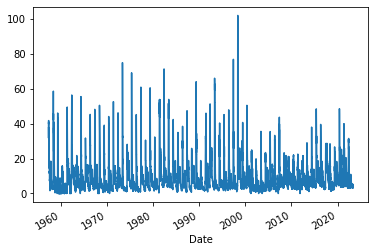

In [60]:
timeseries_FI.loc[:, "FI00591"].plot()

In [100]:
# Check if any column name is NaN
if any(pd.isna(column) for column in timeseries_FI.columns):
    nan_column_names = [column for column in timeseries_FI.columns if pd.isna(column)]
    print("Columns with NaN names:", nan_column_names)
else:
    print("No columns with NaN names.")

No columns with NaN names.


In [61]:
# And here we save our original data:
timeseries_FI.to_csv(r'Julia\timeseries\timeseries_FIo.csv')
network_FI.to_excel(r'Julia\timeseries\network_FIo.xlsx')

* Here we start our gap analysis part:

In [70]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_FI.loc["1981":"2020", :], network_FI.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                  
0300250  29.342999  61.434885      NaN             NaN
0300450  29.402672  61.411670    496.0        3.394935
0410410  27.700825  61.271730    126.0        0.862423
0411200  28.783807  61.210601  14610.0      100.000000
0411450  28.783904  61.210672      0.0        0.000000
...            ...        ...      ...             ...
7300350  29.555404  66.156084      0.0        0.000000
7400200  29.795592  65.897032   8766.0       60.000000
7401000  29.956606  65.871726   5964.0       40.821355
8400800  24.495189  64.607670  11746.0       80.396988
8400900  24.581015  64.688532   7028.0       48.104038

[670 rows x 4 columns]

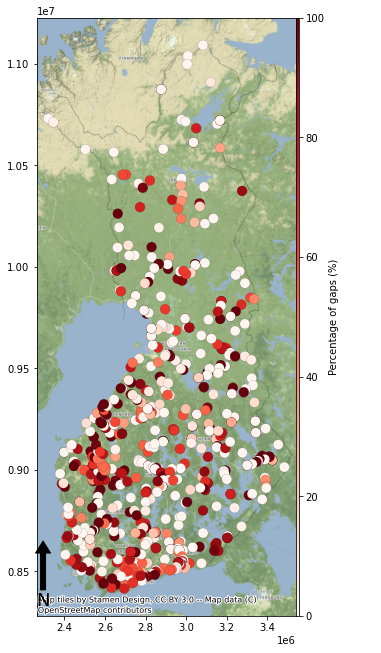

In [71]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

In [ ]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_FI, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

In [72]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

359

In [73]:
timeseriesfinalcondition = timeseries_FI.loc[:, idcondition]
timeseriesfinalcondition

0300450  0410410  0411450  1100500  1405450  1405700  1406220  \
Date                                                                        
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-04-27      NaN    11.50   439.83    16.96     4.13    16.57      NaN   
2023-04-28      NaN    12.06   742.16    16.30     4.13    16.98      NaN   
2023-04-29      NaN    12.44   388.15    15.20     4.13    17.13      NaN   
2023-04-30      NaN    12.74   353.80    13.90     3.89    17.31      NaN   
2023-05-01      NaN    13.18   401.36    13.37     3.89    17.59      NaN   

            1406510  1406600  1406800  ...  7101100  7101320  7101800  \
Date                                   ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-04-27   220.37      NaN      NaN  ...     6.17    26.60     2.06   
2023-04-28   220.39      NaN      NaN  ...     6.81    27.88     2.15   
2023-04-29   224.38      NaN      NaN  ...     7.79    30.34     2.27   
2023-04-30   224.61      NaN      NaN  ...     7.71    30.68     2.41   
2023-05-01   228.72      NaN      NaN  ...     7.83    31.15     2.53   

            7101950  7200500  7300100  7300220  7300350  7401000  8400900  
Date                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-04-27    141.0    12.24    12.90    12.42     3.82     3.81     4.91  
2023-04-28    120.0    12.37    14.01    12.44     5.30     3.83     4.24  
2023-04-29    121.0    13.24    15.78    12.84     5.19     4.15     4.00  
2023-04-30    120.0    13.45    17.41    13.20     5.16     4.39     3.24  
2023-05-01      NaN    13.65    19.07    13.43     4.47     4.48     3.40  

[32172 rows x 359 columns]

In [74]:
networkfinalcondition = network_FI.loc[idcondition, :]
networkfinalcondition

name                   river     area  elev  \
Code                                                                     
0300450             Kangaskoski            Hiitolanjoki   1035.0   NaN   
0410410        Kuolimo - luusua                  Vuoksi    864.0   NaN   
0411450    Vuoksi, Tainionkoski                  Vuoksi  61061.0   NaN   
1100500            Salmen silta                Virojoki    328.0   NaN   
1405450  Arrakosken voimalaitos                Kymijoki      NaN   NaN   
...                         ...                     ...      ...   ...   
7300100             Oulankajoki               Koutajoki   1986.0   NaN   
7300220        Kitkajoki, Käylä               Koutajoki   1706.0   NaN   
7300350              Myllykoski               Koutajoki    734.0   NaN   
7401000       Muojärvi - luusua             Vienan Kemi    870.0   NaN   
8400900               Pattijoki  Perämeren rannikkoalue      NaN   NaN   

               lon        lat  lake country  
Code                                         
0300450  29.402672  61.411670  17.8      FI  
0410410  27.700825  61.271730  23.0      FI  
0411450  28.783904  61.210672  20.0      FI  
1100500  27.632099  60.619895   4.1      FI  
1405450  25.186415  61.387928   NaN      FI  
...            ...        ...   ...     ...  
7300100  29.315239  66.369272   4.8      FI  
7300220  29.144502  66.302003  22.2      FI  
7300350  29.555404  66.156084  14.5      FI  
7401000  29.956606  65.871726  22.0      FI  
8400900  24.581015  64.688532   NaN      FI  

[359 rows x 8 columns]

In [75]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_FI.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_FI.xlsx')


#### 5. Luxemburg:

In [45]:
# Network:
network_LU = pd.read_excel(r"Julia\timeseries\original\network_LU.xlsx")

# Here we clean our dataframe for only the useful columns:
network_LU = network_LU[["ID", "Gauge Name", "Stream", "Catchment Area [km2]", "ID", "Long E", "Lat N"]]

# For Belgium we do not have the elevation information:
network_LU.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]

network_LU.elev = np.nan

# Here we assing the country:
network_LU["country"] = "LU"

# Here we set the code column as the index:
network_LU.set_index("code", inplace = True)

network_LU.index = network_LU.index.astype(str)

network_LU

name         river     area  elev       lon        lat  \
code                                                                          
17             Bigonville          Sure   308.40   NaN  5.801399  49.869821   
10                 Bissen        Attert   291.50   NaN  6.056414  49.784853   
15             Bollendorf          Sure  3227.00   NaN  6.359193  49.850919   
35               Clervaux        Clerve   147.20   NaN  6.027574  50.054520   
13               Dasbourg           Our   450.40   NaN  6.126077  50.049832   
11               Diekirch          Sure  2149.00   NaN  6.161813  49.866622   
42     EttelbrueckAlzette       Alzette  1091.90   NaN  6.098584  49.844800   
19    Heiderscheidergrund          Sure   429.00   NaN  5.950724  49.901196   
2              Hesperange       Alzette   292.30   NaN  6.149080  49.586287   
6               Hunnebuer         Eisch   164.20   NaN  6.079524  49.729184   
14             Kautenbach         Wiltz   427.70   NaN  6.025045  49.946524   
43             Larochette  Ernz Blanche    70.03   NaN  6.219358  49.791584   
1                 Livange      Alzette    231.70   NaN  6.114957  49.526477   
7                  Mersch       Alzette   707.00   NaN  6.115991  49.753068   
34               Michelau          Sure   946.70   NaN  6.091178  49.895421   
3             Pfaffenthal       Alzette   360.50   NaN  6.132266  49.620647   
16                Rosport          Sure  4231.80   NaN  6.509851  49.785883   
5              Schoenfels         Mamer    83.60   NaN  6.100795  49.723112   
12                Vianden           Our   641.30   NaN  6.204738  49.939224   

     country  
code          
17        LU  
10        LU  
15        LU  
35        LU  
13        LU  
11        LU  
42        LU  
19        LU  
2         LU  
6         LU  
14        LU  
43        LU  
1         LU  
7         LU  
34        LU  
3         LU  
16        LU  
5         LU  
12        LU

In [46]:
# Time-series:
# Data lecture:
timeseries_LU = pd.read_excel(r"Julia\timeseries\original\timeseries_LU.xlsx", index_col=0)

timeseries_LU.set_index("Date", inplace = True)

timeseries_LU

10     11      12     13     14     15     16     17     19  \
Date                                                                         
2002-01-01  4.344  36.68  14.450  9.975  6.829  54.68  74.20  5.788  6.601   
2002-01-02  3.717  30.55  11.010  8.076  5.857  40.90  57.54  5.109  6.649   
2002-01-03  3.387  28.56  10.470  7.500  5.158  37.12  50.87  4.517  6.575   
2002-01-04  3.113  24.96   8.050  6.914  4.659  33.64  45.53  4.046  6.557   
2002-01-05  3.009  23.30   5.973  6.840  4.199  32.18  37.64  3.622  5.398   
...           ...    ...     ...    ...    ...    ...    ...    ...    ...   
2021-12-27    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-28    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-29    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-30    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2021-12-31    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                1      2     34  35      3      42  43      5      6       7  
Date                                                                          
2002-01-01  3.054  3.982  18.62 NaN  6.043  17.640 NaN  1.315  2.570  11.350  
2002-01-02  2.521  3.222  15.58 NaN  4.934  14.520 NaN  1.145  2.074   9.209  
2002-01-03  2.124  2.632  15.46 NaN  4.148  12.800 NaN  1.071  1.770   7.856  
2002-01-04  1.886  2.306  13.26 NaN  3.642  10.960 NaN  0.989  1.614   6.855  
2002-01-05  1.615  2.071  12.95 NaN  3.041   9.572 NaN  0.888  1.534   6.049  
...           ...    ...    ...  ..    ...     ...  ..    ...    ...     ...  
2021-12-27    NaN    NaN    NaN NaN    NaN     NaN NaN    NaN    NaN     NaN  
2021-12-28    NaN    NaN    NaN NaN    NaN     NaN NaN    NaN    NaN     NaN  
2021-12-29    NaN    NaN    NaN NaN    NaN     NaN NaN    NaN    NaN     NaN  
2021-12-30    NaN    NaN    NaN NaN    NaN     NaN NaN    NaN    NaN     NaN  
2021-12-31    NaN    NaN    NaN NaN    NaN     NaN NaN    NaN    NaN     NaN  

[7305 rows x 19 columns]

<AxesSubplot:xlabel='Date'>

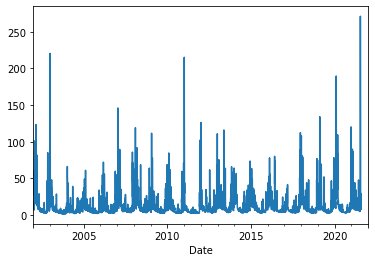

In [75]:
timeseries_LU.loc[:, "42"].plot()

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [76]:
network_LU, timeseries_LU = geospatialfunctions.new_code_function(network_country_input = network_LU.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_LU, 
                                                                name_col_in_network = "code", country = "LU")

network_LU

code                 name         river     area  elev       lon  \
0    17           Bigonville          Sure   308.40   NaN  5.801399   
1    10               Bissen        Attert   291.50   NaN  6.056414   
2    15           Bollendorf          Sure  3227.00   NaN  6.359193   
3    35             Clervaux        Clerve   147.20   NaN  6.027574   
4    13             Dasbourg           Our   450.40   NaN  6.126077   
5    11             Diekirch          Sure  2149.00   NaN  6.161813   
6    42   EttelbrueckAlzette       Alzette  1091.90   NaN  6.098584   
7    19  Heiderscheidergrund          Sure   429.00   NaN  5.950724   
8     2           Hesperange       Alzette   292.30   NaN  6.149080   
9     6            Hunnebuer         Eisch   164.20   NaN  6.079524   
10   14           Kautenbach         Wiltz   427.70   NaN  6.025045   
11   43           Larochette  Ernz Blanche    70.03   NaN  6.219358   
12    1              Livange      Alzette    231.70   NaN  6.114957   
13    7               Mersch       Alzette   707.00   NaN  6.115991   
14   34             Michelau          Sure   946.70   NaN  6.091178   
15    3          Pfaffenthal       Alzette   360.50   NaN  6.132266   
16   16              Rosport          Sure  4231.80   NaN  6.509851   
17    5           Schoenfels         Mamer    83.60   NaN  6.100795   
18   12              Vianden           Our   641.30   NaN  6.204738   

          lat country new_code  
0   49.869821      LU  LU00001  
1   49.784853      LU  LU00002  
2   49.850919      LU  LU00003  
3   50.054520      LU  LU00004  
4   50.049832      LU  LU00005  
5   49.866622      LU  LU00006  
6   49.844800      LU  LU00007  
7   49.901196      LU  LU00008  
8   49.586287      LU  LU00009  
9   49.729184      LU  LU00010  
10  49.946524      LU  LU00011  
11  49.791584      LU  LU00012  
12  49.526477      LU  LU00013  
13  49.753068      LU  LU00014  
14  49.895421      LU  LU00015  
15  49.620647      LU  LU00016  
16  49.785883      LU  LU00017  
17  49.723112      LU  LU00018  
18  49.939224      LU  LU00019

In [77]:
timeseries_LU

LU00002  LU00006  LU00019  LU00005  LU00011  LU00003  LU00017  \
Date                                                                        
2002-01-01    4.344    36.68   14.450    9.975    6.829    54.68    74.20   
2002-01-02    3.717    30.55   11.010    8.076    5.857    40.90    57.54   
2002-01-03    3.387    28.56   10.470    7.500    5.158    37.12    50.87   
2002-01-04    3.113    24.96    8.050    6.914    4.659    33.64    45.53   
2002-01-05    3.009    23.30    5.973    6.840    4.199    32.18    37.64   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            LU00001  LU00008  LU00013  LU00009  LU00015  LU00004  LU00016  \
Date                                                                        
2002-01-01    5.788    6.601    3.054    3.982    18.62      NaN    6.043   
2002-01-02    5.109    6.649    2.521    3.222    15.58      NaN    4.934   
2002-01-03    4.517    6.575    2.124    2.632    15.46      NaN    4.148   
2002-01-04    4.046    6.557    1.886    2.306    13.26      NaN    3.642   
2002-01-05    3.622    5.398    1.615    2.071    12.95      NaN    3.041   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            LU00007  LU00012  LU00018  LU00010  LU00014  
Date                                                     
2002-01-01   17.640      NaN    1.315    2.570   11.350  
2002-01-02   14.520      NaN    1.145    2.074    9.209  
2002-01-03   12.800      NaN    1.071    1.770    7.856  
2002-01-04   10.960      NaN    0.989    1.614    6.855  
2002-01-05    9.572      NaN    0.888    1.534    6.049  
...             ...      ...      ...      ...      ...  
2021-12-27      NaN      NaN      NaN      NaN      NaN  
2021-12-28      NaN      NaN      NaN      NaN      NaN  
2021-12-29      NaN      NaN      NaN      NaN      NaN  
2021-12-30      NaN      NaN      NaN      NaN      NaN  
2021-12-31      NaN      NaN      NaN      NaN      NaN  

[7305 rows x 19 columns]

<AxesSubplot:xlabel='Date'>

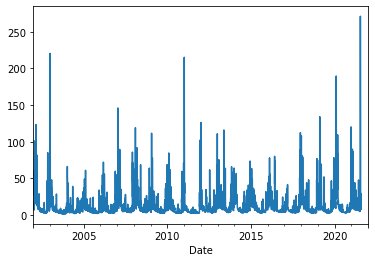

In [78]:
timeseries_LU.loc[:, "LU00007"].plot()

In [79]:
# And here we save our original data:
timeseries_LU.to_csv(r'Julia\timeseries\timeseries_LUo.csv')
network_LU.to_excel(r'Julia\timeseries\network_LUo.xlsx')

* Here we start our gap analysis part:

In [86]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_LU.loc["1981":"2020", :], network_LU.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                              
17    5.801399  49.869821      0.0        0.000000
10    6.056414  49.784853      0.0        0.000000
15    6.359193  49.850919      0.0        0.000000
35    6.027574  50.054520   2922.0       42.103746
13    6.126077  50.049832      0.0        0.000000
11    6.161813  49.866622      0.0        0.000000
42    6.098584  49.844800      0.0        0.000000
19    5.950724  49.901196      0.0        0.000000
2     6.149080  49.586287      0.0        0.000000
6     6.079524  49.729184      0.0        0.000000
14    6.025045  49.946524      0.0        0.000000
43    6.219358  49.791584   4748.0       68.414986
1     6.114957  49.526477      0.0        0.000000
7     6.115991  49.753068      0.0        0.000000
34    6.091178  49.895421      0.0        0.000000
3     6.132266  49.620647      0.0        0.000000
16    6.509851  49.785883      0.0        0.000000
5     6.100795  49.723112      0.0        0.000000
12    6.204738  49.939224      0.0        0.000000

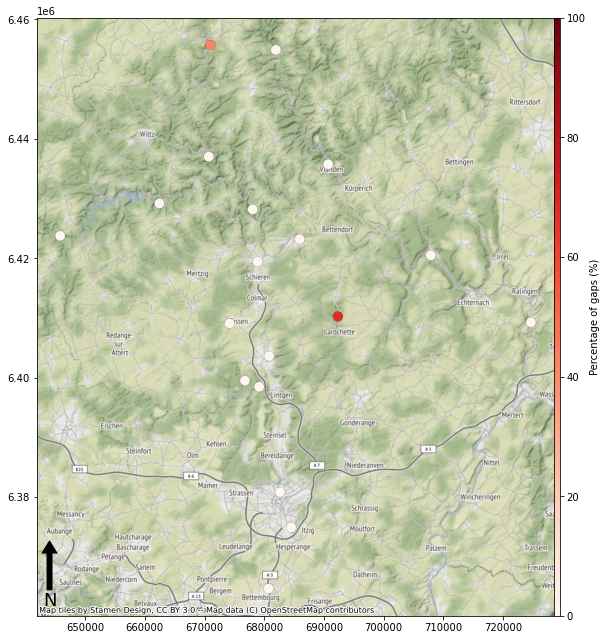

In [87]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

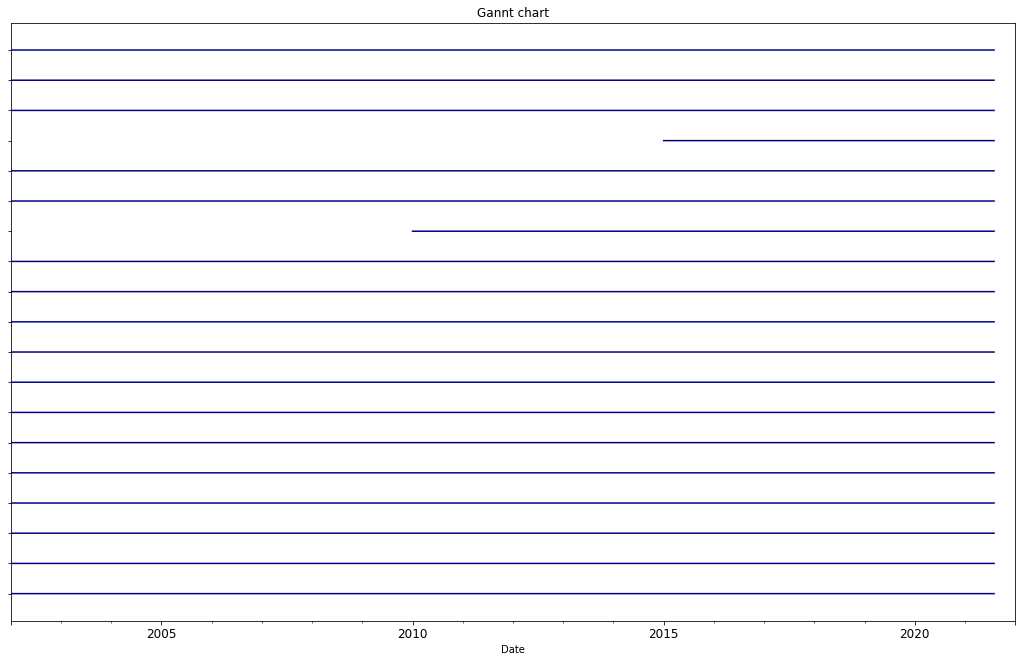

In [88]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_LU, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

In [89]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

18

In [90]:
timeseriesfinalcondition = timeseries_LU.loc[:, idcondition]
timeseriesfinalcondition

17     10     15  35     13     11      42     19      2  \
Date                                                                      
2002-01-01  5.788  4.344  54.68 NaN  9.975  36.68  17.640  6.601  3.982   
2002-01-02  5.109  3.717  40.90 NaN  8.076  30.55  14.520  6.649  3.222   
2002-01-03  4.517  3.387  37.12 NaN  7.500  28.56  12.800  6.575  2.632   
2002-01-04  4.046  3.113  33.64 NaN  6.914  24.96  10.960  6.557  2.306   
2002-01-05  3.622  3.009  32.18 NaN  6.840  23.30   9.572  5.398  2.071   
...           ...    ...    ...  ..    ...    ...     ...    ...    ...   
2021-12-27    NaN    NaN    NaN NaN    NaN    NaN     NaN    NaN    NaN   
2021-12-28    NaN    NaN    NaN NaN    NaN    NaN     NaN    NaN    NaN   
2021-12-29    NaN    NaN    NaN NaN    NaN    NaN     NaN    NaN    NaN   
2021-12-30    NaN    NaN    NaN NaN    NaN    NaN     NaN    NaN    NaN   
2021-12-31    NaN    NaN    NaN NaN    NaN    NaN     NaN    NaN    NaN   

                6     14      1       7     34      3     16      5      12  
Date                                                                         
2002-01-01  2.570  6.829  3.054  11.350  18.62  6.043  74.20  1.315  14.450  
2002-01-02  2.074  5.857  2.521   9.209  15.58  4.934  57.54  1.145  11.010  
2002-01-03  1.770  5.158  2.124   7.856  15.46  4.148  50.87  1.071  10.470  
2002-01-04  1.614  4.659  1.886   6.855  13.26  3.642  45.53  0.989   8.050  
2002-01-05  1.534  4.199  1.615   6.049  12.95  3.041  37.64  0.888   5.973  
...           ...    ...    ...     ...    ...    ...    ...    ...     ...  
2021-12-27    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN  
2021-12-28    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN  
2021-12-29    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN  
2021-12-30    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN  
2021-12-31    NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN     NaN  

[7305 rows x 18 columns]

In [91]:
networkfinalcondition = network_LU.loc[idcondition, :]
networkfinalcondition

name     river    area  elev       lon        lat country
Code                                                                          
17             Bigonville      Sure   308.4   NaN  5.801399  49.869821      LU
10                 Bissen    Attert   291.5   NaN  6.056414  49.784853      LU
15             Bollendorf      Sure  3227.0   NaN  6.359193  49.850919      LU
35               Clervaux    Clerve   147.2   NaN  6.027574  50.054520      LU
13               Dasbourg       Our   450.4   NaN  6.126077  50.049832      LU
11               Diekirch      Sure  2149.0   NaN  6.161813  49.866622      LU
42     EttelbrueckAlzette   Alzette  1091.9   NaN  6.098584  49.844800      LU
19    Heiderscheidergrund      Sure   429.0   NaN  5.950724  49.901196      LU
2              Hesperange   Alzette   292.3   NaN  6.149080  49.586287      LU
6               Hunnebuer     Eisch   164.2   NaN  6.079524  49.729184      LU
14             Kautenbach     Wiltz   427.7   NaN  6.025045  49.946524      LU
1                 Livange  Alzette    231.7   NaN  6.114957  49.526477      LU
7                  Mersch   Alzette   707.0   NaN  6.115991  49.753068      LU
34               Michelau      Sure   946.7   NaN  6.091178  49.895421      LU
3             Pfaffenthal   Alzette   360.5   NaN  6.132266  49.620647      LU
16                Rosport      Sure  4231.8   NaN  6.509851  49.785883      LU
5              Schoenfels     Mamer    83.6   NaN  6.100795  49.723112      LU
12                Vianden       Our   641.3   NaN  6.204738  49.939224      LU

In [92]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_LU.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_LU.xlsx')


#### 6. Netherlands:

In [47]:
# Data lecture:
network_NL = pd.read_excel(r"Julia\timeseries\original\network_NL.xlsx")

# Here we clean our dataframe for only the useful columns:
network_NL = network_NL[["ID", "Gauge Name", "Stream", "Catchment Area [km2]", "ID", "Long E", "Lat N"]]

# For Belgium we do not have the elevation information:
network_NL.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]

network_NL.elev = np.nan

# Here we assing the country:
network_NL["country"] = "NL"

# Here we set the code column as the index:
network_NL.set_index("code", inplace = True)

network_NL.index = network_NL.index.astype(str)

network_NL

name       river       area  elev       lon        lat  \
code                                                                         
24                  Stah        Roer    2152.00   NaN  6.104481  51.097734   
312      Vlootbekermolen   Vlootbeek      76.67   NaN  5.924372  51.149860   
1132                 Eys   Eyserbeek      27.11   NaN  5.929363  50.825340   
1231              Partij  Selzerbeek      28.74   NaN  5.921758  50.810588   
1334        Azijnfabriek        Gulp      46.05   NaN  5.891548  50.814140   
1541               Mesch        Voer      56.95   NaN  5.736490  50.764106   
1642               Nekum       Jeker     462.09   NaN  5.672606  50.827608   
6421102            Venlo       Meuse   26040.00   NaN  6.160176  51.368806   
6421500        Borgharen       Meuse   21301.00   NaN  5.693836  50.871400   
6435060           Lobith       Rhine  160800.00   NaN  6.110000  51.849000   

        country  
code             
24           NL  
312          NL  
1132         NL  
1231         NL  
1334         NL  
1541         NL  
1642         NL  
6421102      NL  
6421500      NL  
6435060      NL

In [48]:
# Time-series:
# Data lecture:
timeseries_NL = pd.read_excel(r"Julia\timeseries\original\timeseries_NL.xlsx", index_col=0)

timeseries_NL.set_index("Date", inplace = True)

timeseries_NL

6435060  24  312  1132  1231  1334  1541  1642     6421102  \
Date                                                                         
1901-01-01  2035.000000 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN   
1901-01-02  2270.000000 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN   
1901-01-03  2445.000000 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN   
1901-01-04  2325.000000 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN   
1901-01-05  2175.000000 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN   
...                 ...  ..  ...   ...   ...   ...   ...   ...         ...   
2021-12-27  1409.930347 NaN  NaN   NaN   NaN   NaN   NaN   NaN  262.611319   
2021-12-28  1498.322014 NaN  NaN   NaN   NaN   NaN   NaN   NaN  270.035069   
2021-12-29  1765.884375 NaN  NaN   NaN   NaN   NaN   NaN   NaN  391.467986   
2021-12-30  2224.316042 NaN  NaN   NaN   NaN   NaN   NaN   NaN  463.203542   
2021-12-31  2713.394583 NaN  NaN   NaN   NaN   NaN   NaN   NaN  494.191667   

               6421500  
Date                    
1901-01-01         NaN  
1901-01-02         NaN  
1901-01-03         NaN  
1901-01-04         NaN  
1901-01-05         NaN  
...                ...  
2021-12-27  224.854528  
2021-12-28  279.114380  
2021-12-29  395.257434  
2021-12-30  436.381842  
2021-12-31  442.000680  

[44195 rows x 10 columns]

<AxesSubplot:xlabel='Date'>

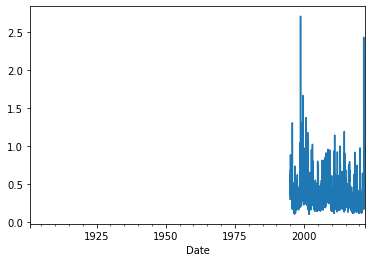

In [80]:
timeseries_NL.loc[:, "1541"].plot()

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [81]:
network_NL, timeseries_NL = geospatialfunctions.new_code_function(network_country_input = network_NL.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_NL, 
                                                                name_col_in_network = "code", country = "NL")

network_NL

code             name       river       area  elev       lon        lat  \
0       24             Stah        Roer    2152.00   NaN  6.104481  51.097734   
1      312  Vlootbekermolen   Vlootbeek      76.67   NaN  5.924372  51.149860   
2     1132              Eys   Eyserbeek      27.11   NaN  5.929363  50.825340   
3     1231           Partij  Selzerbeek      28.74   NaN  5.921758  50.810588   
4     1334     Azijnfabriek        Gulp      46.05   NaN  5.891548  50.814140   
5     1541            Mesch        Voer      56.95   NaN  5.736490  50.764106   
6     1642            Nekum       Jeker     462.09   NaN  5.672606  50.827608   
7  6421102            Venlo       Meuse   26040.00   NaN  6.160176  51.368806   
8  6421500        Borgharen       Meuse   21301.00   NaN  5.693836  50.871400   
9  6435060           Lobith       Rhine  160800.00   NaN  6.110000  51.849000   

  country new_code  
0      NL  NL00001  
1      NL  NL00002  
2      NL  NL00003  
3      NL  NL00004  
4      NL  NL00005  
5      NL  NL00006  
6      NL  NL00007  
7      NL  NL00008  
8      NL  NL00009  
9      NL  NL00010

In [82]:
timeseries_NL

NL00010  NL00001  NL00002  NL00003  NL00004  NL00005  NL00006  \
Date                                                                            
1901-01-01  2035.000000      NaN      NaN      NaN      NaN      NaN      NaN   
1901-01-02  2270.000000      NaN      NaN      NaN      NaN      NaN      NaN   
1901-01-03  2445.000000      NaN      NaN      NaN      NaN      NaN      NaN   
1901-01-04  2325.000000      NaN      NaN      NaN      NaN      NaN      NaN   
1901-01-05  2175.000000      NaN      NaN      NaN      NaN      NaN      NaN   
...                 ...      ...      ...      ...      ...      ...      ...   
2021-12-27  1409.930347      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-28  1498.322014      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-29  1765.884375      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-30  2224.316042      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31  2713.394583      NaN      NaN      NaN      NaN      NaN      NaN   

            NL00007     NL00008     NL00009  
Date                                         
1901-01-01      NaN         NaN         NaN  
1901-01-02      NaN         NaN         NaN  
1901-01-03      NaN         NaN         NaN  
1901-01-04      NaN         NaN         NaN  
1901-01-05      NaN         NaN         NaN  
...             ...         ...         ...  
2021-12-27      NaN  262.611319  224.854528  
2021-12-28      NaN  270.035069  279.114380  
2021-12-29      NaN  391.467986  395.257434  
2021-12-30      NaN  463.203542  436.381842  
2021-12-31      NaN  494.191667  442.000680  

[44195 rows x 10 columns]

<AxesSubplot:xlabel='Date'>

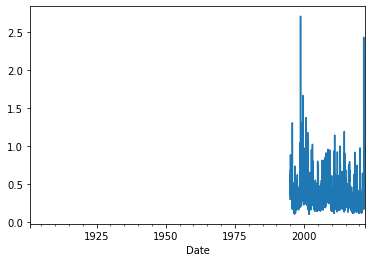

In [83]:
timeseries_NL.loc[:, "NL00006"].plot()

In [99]:
# Check if any column name is NaN
if any(pd.isna(column) for column in timeseries_NL.columns):
    nan_column_names = [column for column in timeseries_NL.columns if pd.isna(column)]
    print("Columns with NaN names:", nan_column_names)
else:
    print("No columns with NaN names.")

No columns with NaN names.


In [84]:
# And here we save our original data:
timeseries_NL.to_csv(r'Julia\timeseries\timeseries_NLo.csv')
network_NL.to_excel(r'Julia\timeseries\network_NLo.xlsx')

* Here we start our gap analysis part:

In [96]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_NL.loc["1981":"2020", :], network_NL.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                 
24       6.104481  51.097734     64.0        0.438056
312      5.924372  51.149860   1081.0        7.399042
1132     5.929363  50.825340   3855.0       26.386037
1231     5.921758  50.810588   5175.0       35.420945
1334     5.891548  50.814140   2165.0       14.818617
1541     5.736490  50.764106   5200.0       35.592060
1642     5.672606  50.827608    582.0        3.983573
6421102  6.160176  51.368806   5665.0       38.774812
6421500  5.693836  50.871400      0.0        0.000000
6435060  6.110000  51.849000      0.0        0.000000

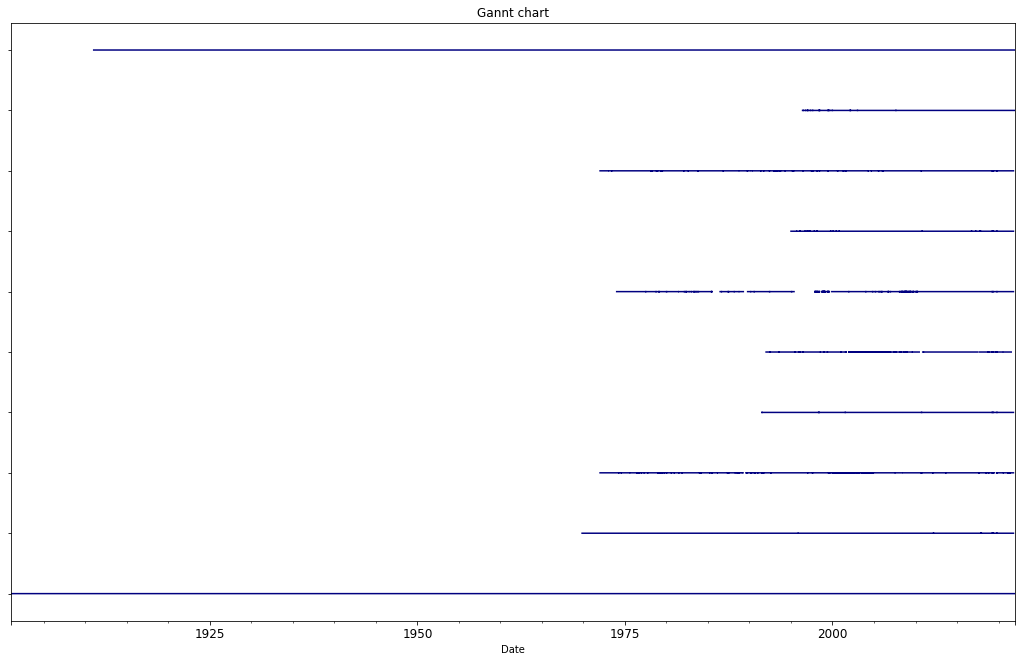

In [97]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_NL, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

In [98]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

10

In [99]:
timeseriesfinalcondition = timeseries_NL.loc[:, idcondition]
timeseriesfinalcondition

24  312  1132  1231  1334  1541  1642     6421102     6421500  \
Date                                                                        
1901-01-01 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
1901-01-02 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
1901-01-03 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
1901-01-04 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
1901-01-05 NaN  NaN   NaN   NaN   NaN   NaN   NaN         NaN         NaN   
...         ..  ...   ...   ...   ...   ...   ...         ...         ...   
2021-12-27 NaN  NaN   NaN   NaN   NaN   NaN   NaN  262.611319  224.854528   
2021-12-28 NaN  NaN   NaN   NaN   NaN   NaN   NaN  270.035069  279.114380   
2021-12-29 NaN  NaN   NaN   NaN   NaN   NaN   NaN  391.467986  395.257434   
2021-12-30 NaN  NaN   NaN   NaN   NaN   NaN   NaN  463.203542  436.381842   
2021-12-31 NaN  NaN   NaN   NaN   NaN   NaN   NaN  494.191667  442.000680   

                6435060  
Date                     
1901-01-01  2035.000000  
1901-01-02  2270.000000  
1901-01-03  2445.000000  
1901-01-04  2325.000000  
1901-01-05  2175.000000  
...                 ...  
2021-12-27  1409.930347  
2021-12-28  1498.322014  
2021-12-29  1765.884375  
2021-12-30  2224.316042  
2021-12-31  2713.394583  

[44195 rows x 10 columns]

In [100]:
networkfinalcondition = network_NL.loc[idcondition, :]
networkfinalcondition

name       river       area  elev       lon        lat  \
Code                                                                         
24                  Stah        Roer    2152.00   NaN  6.104481  51.097734   
312      Vlootbekermolen   Vlootbeek      76.67   NaN  5.924372  51.149860   
1132                 Eys   Eyserbeek      27.11   NaN  5.929363  50.825340   
1231              Partij  Selzerbeek      28.74   NaN  5.921758  50.810588   
1334        Azijnfabriek        Gulp      46.05   NaN  5.891548  50.814140   
1541               Mesch        Voer      56.95   NaN  5.736490  50.764106   
1642               Nekum       Jeker     462.09   NaN  5.672606  50.827608   
6421102            Venlo       Meuse   26040.00   NaN  6.160176  51.368806   
6421500        Borgharen       Meuse   21301.00   NaN  5.693836  50.871400   
6435060           Lobith       Rhine  160800.00   NaN  6.110000  51.849000   

        country  
Code             
24           NL  
312          NL  
1132         NL  
1231         NL  
1334         NL  
1541         NL  
1642         NL  
6421102      NL  
6421500      NL  
6435060      NL

In [101]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_NL.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_NL.xlsx')


#### 7. Norway:

In [49]:
# 24. Norway (<50% gaps):
network_NO = pd.read_excel(r"Julia\timeseries\original\network_NO.xlsx")

# Here we clean our dataframe for only the useful columns:
network_NO = network_NO[["Station_no", "Station_name", "River_name_hierarchy", "Total_field_area_(km2)", "Station_no", "X", "Y"]]
network_NO.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]

# We do not have the elevation information:
network_NO.elev = np.nan

# Here we assing the country:
network_NO["country"] = "NO"

# Here we set the code column as the index:
network_NO.set_index("code", inplace = True)

network_NO.index = network_NO.index.astype(str)

network_NO

name                                       river  \
code                                                                           
29.19.0              Høylandsåna                                     Storåna   
29.11.0            Sandvedparken                                     Storåna   
29.10.0        Stokkelandsvatnet                                     Storåna   
28.7.0                  Haugland                                       Hååna   
27.52.0  Byrkjelandsvatnet utløp                         Bjerkreimvassdraget   
...                          ...                                         ...   
33.4.0         Kalltveit i Årdal                                  Årdalselva   
307.7.0                  Landbru                        Linvasselva/Faxälven   
303.2.0                  Kobvatn  Siddisjaurevassdraget/Vietasätno/Luleälven   
30.8.0               Øvstabøstøl                                  Dirdalsåna   
3.22.0                   Høgfoss                             Mossevassdraget   

           area  elev        lon        lat country  
code                                                 
29.19.0   16.38   NaN   5.740205  58.832218      NO  
29.11.0   24.50   NaN   5.730242  58.842287      NO  
29.10.0   19.34   NaN   5.717747  58.821528      NO  
28.7.0   139.35   NaN   5.647563  58.692906      NO  
27.52.0  177.47   NaN   6.198604  58.697443      NO  
...         ...   ...        ...        ...     ...  
33.4.0   307.38   NaN   6.283894  59.134914      NO  
307.7.0   61.37   NaN  13.916363  64.886736      NO  
303.2.0   82.70   NaN  17.106267  68.146980      NO  
30.8.0    49.85   NaN   6.573901  58.867643      NO  
3.22.0   299.62   NaN  10.856106  59.551606      NO  

[189 rows x 7 columns]

In [50]:
# Time-series:
# Data lecture:
timeseries_NO = pd.read_csv(r"Julia\timeseries\original\timeseries_NO.csv", index_col=0)

timeseries_NO.set_index("Dato", inplace = True)
timeseries_NO.index.name = "Date"

# Here we extract only the code inside the column:
timeseries_NO.columns = timeseries_NO.columns.str.extract(r'\((.*?)\)')[0]

timeseries_NO = timeseries_NO.apply(pd.to_numeric, errors='coerce')

timeseries_NO

0           29.19.0  29.11.0  29.10.0  28.7.0  27.52.0  27.42.0  27.20.0  \
Date                                                                       
1900-01-01      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
...             ...      ...      ...     ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN     NaN      NaN      NaN      NaN   

0           27.16.0  26.22.0  26.20.0  ...  42.2.0  41.4.0  38.1.0  36.9.0  \
Date                                   ...                                   
1900-01-01      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-02      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-03      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-04      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-05      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
...             ...      ...      ...  ...     ...     ...     ...     ...   
2023-12-27      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-28      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-29      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-30      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-31      NaN      NaN      NaN  ...     NaN     NaN     NaN     NaN   

0           35.2.0  33.4.0  307.7.0  303.2.0  30.8.0  3.22.0  
Date                                                          
1900-01-01     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-02     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-03     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-04     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-05     NaN     NaN      NaN      NaN     NaN     NaN  
...            ...     ...      ...      ...     ...     ...  
2023-12-27     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-28     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-29     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-30     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-31     NaN     NaN      NaN      NaN     NaN     NaN  

[45290 rows x 189 columns]

In [85]:
network_NO = network_NO.loc[timeseries_NO.columns, :]

network_NO.index.name = "code"
network_NO

name                                       river  \
code                                                                           
29.19.0              Høylandsåna                                     Storåna   
29.11.0            Sandvedparken                                     Storåna   
29.10.0        Stokkelandsvatnet                                     Storåna   
28.7.0                  Haugland                                       Hååna   
27.52.0  Byrkjelandsvatnet utløp                         Bjerkreimvassdraget   
...                          ...                                         ...   
33.4.0         Kalltveit i Årdal                                  Årdalselva   
307.7.0                  Landbru                        Linvasselva/Faxälven   
303.2.0                  Kobvatn  Siddisjaurevassdraget/Vietasätno/Luleälven   
30.8.0               Øvstabøstøl                                  Dirdalsåna   
3.22.0                   Høgfoss                             Mossevassdraget   

           area  elev        lon        lat country  
code                                                 
29.19.0   16.38   NaN   5.740205  58.832218      NO  
29.11.0   24.50   NaN   5.730242  58.842287      NO  
29.10.0   19.34   NaN   5.717747  58.821528      NO  
28.7.0   139.35   NaN   5.647563  58.692906      NO  
27.52.0  177.47   NaN   6.198604  58.697443      NO  
...         ...   ...        ...        ...     ...  
33.4.0   307.38   NaN   6.283894  59.134914      NO  
307.7.0   61.37   NaN  13.916363  64.886736      NO  
303.2.0   82.70   NaN  17.106267  68.146980      NO  
30.8.0    49.85   NaN   6.573901  58.867643      NO  
3.22.0   299.62   NaN  10.856106  59.551606      NO  

[189 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

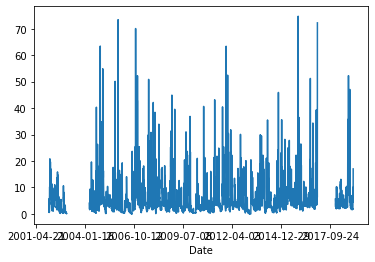

In [86]:
timeseries_NO.loc[:, "33.4.0"].plot()

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [87]:
network_NO, timeseries_NO = geospatialfunctions.new_code_function(network_country_input = network_NO.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_NO, 
                                                                name_col_in_network = "code", country = "NO")

network_NO

code                     name  \
0    29.19.0              Høylandsåna   
1    29.11.0            Sandvedparken   
2    29.10.0        Stokkelandsvatnet   
3     28.7.0                 Haugland   
4    27.52.0  Byrkjelandsvatnet utløp   
..       ...                      ...   
184   33.4.0        Kalltveit i Årdal   
185  307.7.0                  Landbru   
186  303.2.0                  Kobvatn   
187   30.8.0              Øvstabøstøl   
188   3.22.0                  Høgfoss   

                                          river    area  elev        lon  \
0                                       Storåna   16.38   NaN   5.740205   
1                                       Storåna   24.50   NaN   5.730242   
2                                       Storåna   19.34   NaN   5.717747   
3                                         Hååna  139.35   NaN   5.647563   
4                           Bjerkreimvassdraget  177.47   NaN   6.198604   
..                                          ...     ...   ...        ...   
184                                  Årdalselva  307.38   NaN   6.283894   
185                        Linvasselva/Faxälven   61.37   NaN  13.916363   
186  Siddisjaurevassdraget/Vietasätno/Luleälven   82.70   NaN  17.106267   
187                                  Dirdalsåna   49.85   NaN   6.573901   
188                             Mossevassdraget  299.62   NaN  10.856106   

           lat country new_code  
0    58.832218      NO  NO00001  
1    58.842287      NO  NO00002  
2    58.821528      NO  NO00003  
3    58.692906      NO  NO00004  
4    58.697443      NO  NO00005  
..         ...     ...      ...  
184  59.134914      NO  NO00185  
185  64.886736      NO  NO00186  
186  68.146980      NO  NO00187  
187  58.867643      NO  NO00188  
188  59.551606      NO  NO00189  

[189 rows x 9 columns]

In [88]:
timeseries_NO

0           NO00001  NO00002  NO00003  NO00004  NO00005  NO00006  NO00007  \
Date                                                                        
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

0           NO00008  NO00009  NO00010  ...  NO00180  NO00181  NO00182  \
Date                                   ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

0           NO00183  NO00184  NO00185  NO00186  NO00187  NO00188  NO00189  
Date                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[45290 rows x 189 columns]

<AxesSubplot:xlabel='Date'>

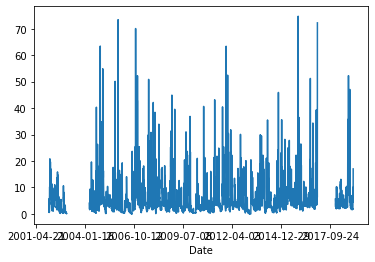

In [89]:
timeseries_NO.loc[:, "NO00185"].plot()

In [98]:
# Check if any column name is NaN
if any(pd.isna(column) for column in timeseries_NO.columns):
    nan_column_names = [column for column in timeseries_NO.columns if pd.isna(column)]
    print("Columns with NaN names:", nan_column_names)
else:
    print("No columns with NaN names.")

No columns with NaN names.


In [90]:
# And here we save our original data:
timeseries_NO.to_csv(r'Julia\timeseries\timeseries_NOo.csv')
network_NO.to_excel(r'Julia\timeseries\network_NOo.xlsx')

* Here we start our gap analysis part:

In [110]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_NO.loc["1981":"2020", :], network_NO.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                  
29.19.0   5.740205  58.832218  14244.0      100.000000
29.11.0   5.730242  58.842287  13672.0       95.984274
29.10.0   5.717747  58.821528  13670.0       95.970233
28.7.0    5.647563  58.692906      0.0        0.000000
27.52.0   6.198604  58.697443  12302.0       86.366189
...            ...        ...      ...             ...
33.4.0    6.283894  59.134914   8870.0       62.271834
307.7.0  13.916363  64.886736      0.0        0.000000
303.2.0  17.106267  68.146980   2819.0       19.790789
30.8.0    6.573901  58.867643   6143.0       43.126931
3.22.0   10.856106  59.551606      0.0        0.000000

[189 rows x 4 columns]

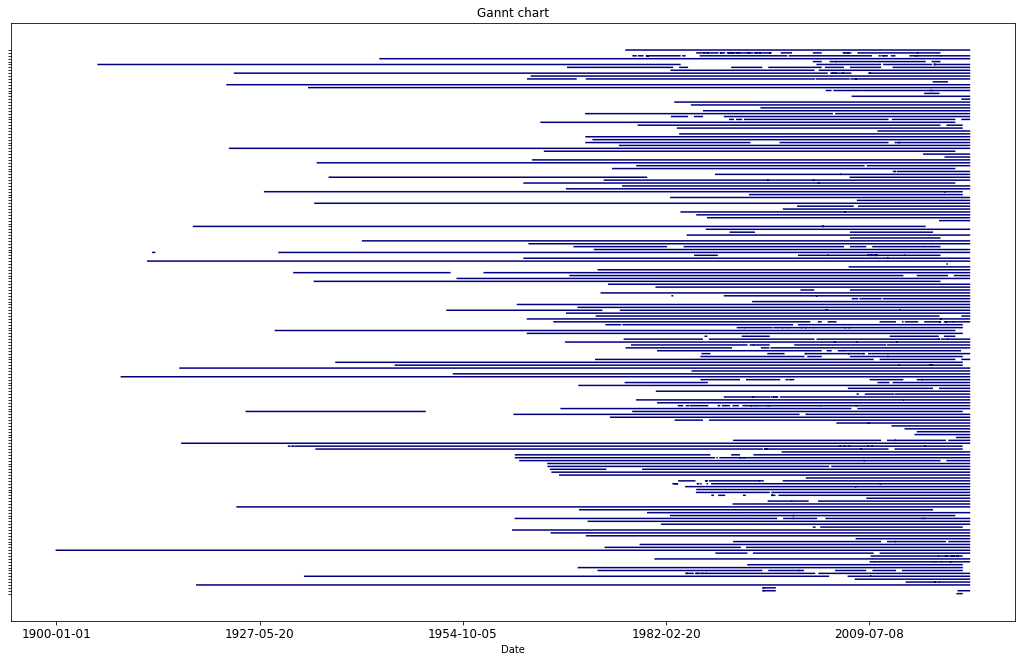

In [111]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_NO, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

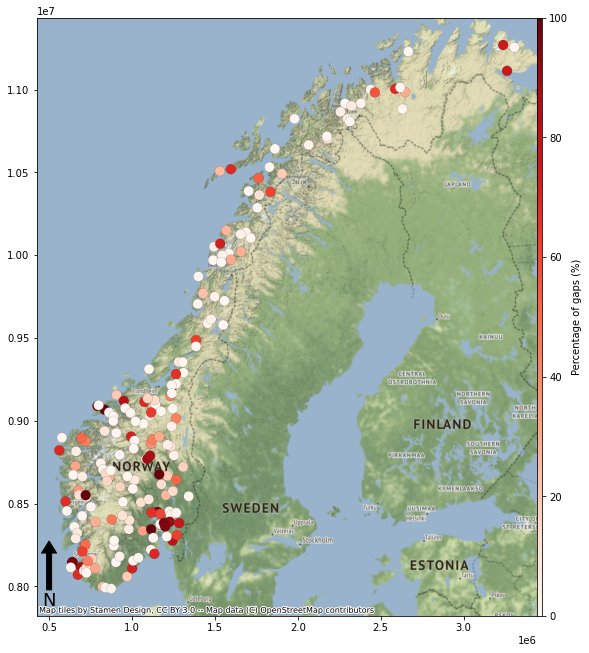

In [112]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

In [113]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

146

In [114]:
timeseriesfinalcondition = timeseries_NO.loc[:, idcondition]
timeseriesfinalcondition

0           28.7.0  27.20.0  27.16.0  26.22.0  26.20.0  25.32.0  237.1.0  \
Date                                                                       
1900-01-01     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...            ...      ...      ...      ...      ...      ...      ...   
2023-12-27     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-28     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-29     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-30     NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31     NaN      NaN      NaN      NaN      NaN      NaN      NaN   

0           23.8.0    22.4.0  22.22.0  ...  46.4.0  42.2.0  41.4.0  38.1.0  \
Date                                   ...                                   
1900-01-01     NaN  6.312080      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-02     NaN  6.312080      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-03     NaN  6.312080      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-04     NaN  6.182306      NaN  ...     NaN     NaN     NaN     NaN   
1900-01-05     NaN  6.182306      NaN  ...     NaN     NaN     NaN     NaN   
...            ...       ...      ...  ...     ...     ...     ...     ...   
2023-12-27     NaN       NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-28     NaN       NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-29     NaN       NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-30     NaN       NaN      NaN  ...     NaN     NaN     NaN     NaN   
2023-12-31     NaN       NaN      NaN  ...     NaN     NaN     NaN     NaN   

0           36.9.0  35.2.0  307.7.0  303.2.0  30.8.0  3.22.0  
Date                                                          
1900-01-01     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-02     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-03     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-04     NaN     NaN      NaN      NaN     NaN     NaN  
1900-01-05     NaN     NaN      NaN      NaN     NaN     NaN  
...            ...     ...      ...      ...     ...     ...  
2023-12-27     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-28     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-29     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-30     NaN     NaN      NaN      NaN     NaN     NaN  
2023-12-31     NaN     NaN      NaN      NaN     NaN     NaN  

[45290 rows x 146 columns]

In [115]:
networkfinalcondition = network_NO.loc[idcondition, :]
networkfinalcondition

name                                       river    area  \
Code                                                                       
28.7.0      Haugland                                       Hååna  139.35   
27.20.0          Gya                              Hellelandselva   60.49   
27.16.0      Bjordal                  Oreåna/Bjerkreimvassdraget  123.81   
26.22.0          Deg                                    Deg/Sira   68.96   
26.20.0        Årdal                                Moisåni/Sira   77.25   
...              ...                                         ...     ...   
35.2.0     Hauge bru                                        Ulla  394.08   
307.7.0      Landbru                        Linvasselva/Faxälven   61.37   
303.2.0      Kobvatn  Siddisjaurevassdraget/Vietasätno/Luleälven   82.70   
30.8.0   Øvstabøstøl                                  Dirdalsåna   49.85   
3.22.0       Høgfoss                             Mossevassdraget  299.62   

         elev        lon        lat country  
Code                                         
28.7.0    NaN   5.647563  58.692906      NO  
27.20.0   NaN   6.361395  58.600031      NO  
27.16.0   NaN   6.494269  58.685532      NO  
26.22.0   NaN   6.792237  58.934151      NO  
26.20.0   NaN   6.497919  58.543670      NO  
...       ...        ...        ...     ...  
35.2.0    NaN   6.449503  59.329901      NO  
307.7.0   NaN  13.916363  64.886736      NO  
303.2.0   NaN  17.106267  68.146980      NO  
30.8.0    NaN   6.573901  58.867643      NO  
3.22.0    NaN  10.856106  59.551606      NO  

[146 rows x 7 columns]

In [116]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_NO.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_NO.xlsx')


#### 8. Sweden:

In [51]:
# Data lecture:
network_SE = pd.read_csv(r"Julia\timeseries\original\network_SE.csv")

# Here we clean our dataframe for only the useful columns:
network_SE = network_SE[["Station_ID", "Station_Name", "River", "Area_[km2]", "Station_Name", "Lon", "Lat"]]
network_SE.columns = ["code", "name", "river", "area", "elev", "lon", "lat"]

# We do not have the elevation information:
network_SE.elev = np.nan

# Here we assing the country:
network_SE["country"] = "SE"

network_SE.code = network_SE.code.astype(str)

network_SE.set_index("code", inplace = True)

network_SE

name            river    area  elev      lon      lat  \
code                                                                      
10006      KARESUVANTO        MUONIOÄLV  5960.4   NaN  22.4779  68.4437   
10016           MAGNOR      VRÅNGSÄLVEN   359.5   NaN  12.1873  59.9546   
1069           MÖCKELN          MÖCKELN  1026.0   NaN  14.1220  56.6654   
1083          LILLGLÄN           TÄNNÅN    64.6   NaN  12.1278  62.6386   
11            MÄNNIKKÖ     TÄRENDÖÄLVEN  5856.2   NaN  22.4077  67.4066   
...                ...              ...     ...   ...      ...      ...   
751         VASSBOTTEN  ENNINGDALSÄLVEN   624.1   NaN  11.5368  58.8771   
855            GETEBRO         ALSTERÅN  1332.7   NaN  16.1639  56.9996   
887           SOLVEDEN           SÄVEÅN  1109.0   NaN  12.4423  57.8754   
957    ÖVRE ABISKOJOKK       TORNEÄLVEN   566.3   NaN  18.7841  68.3607   
97           GIMDALSBY           IDSJÖN  2163.6   NaN  15.7092  62.8193   

      country  
code           
10006      SE  
10016      SE  
1069       SE  
1083       SE  
11         SE  
...       ...  
751        SE  
855        SE  
887        SE  
957        SE  
97         SE  

[294 rows x 7 columns]

In [52]:
# Time-series:
# Data lecture:
timeseries_SE = pd.read_excel(r"Julia\timeseries\original\timeseries_SE.xlsx", index_col=0)

timeseries_SE.index.name = "Date"

# Here we adjust our columns names:
timeseries_SE.columns = [col.split('-')[0] for col in timeseries_SE.columns]


# Identify duplicate columns
duplicate_columns = timeseries_SE.columns[timeseries_SE.columns.duplicated()]

# Remove duplicate columns
timeseries_SE = timeseries_SE.drop(columns=duplicate_columns)
timeseries_SE.columns


timeseries_SE = timeseries_SE.apply(pd.to_numeric, errors='coerce')

timeseries_SE

138  10006  10016  1069   1083  11  1123  1159  1160  1166  ...  \
Date                                                                     ...   
1900-01-01  12.0    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN  ...   
1900-01-02  11.0    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN  ...   
1900-01-03  11.0    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN  ...   
1900-01-04  11.0    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN  ...   
1900-01-05  11.0    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN  ...   
...          ...    ...    ...   ...    ...  ..   ...   ...   ...   ...  ...   
2023-04-06  63.5   77.0   5.53  22.5  0.116 NaN  2.20   NaN  1.45  16.4  ...   
2023-04-07  64.5   77.0   5.30  22.5  0.114 NaN  2.19   NaN  1.44  15.6  ...   
2023-04-08  64.6   77.0   5.47  22.5  0.111 NaN  2.19   NaN  1.44  14.7  ...   
2023-04-09  64.2   78.0   5.91  22.5  0.109 NaN  2.19   NaN  1.46  12.9  ...   
2023-04-10  63.2   80.0   6.67  22.5  0.108 NaN  2.19   NaN  1.47  12.4  ...   

            558   591   654  736   740   751   855   887    957    97  
Date                                                                   
1900-01-01  NaN   NaN   NaN  NaN   NaN   NaN   NaN  10.0    NaN   NaN  
1900-01-02  NaN   NaN   NaN  NaN   NaN   NaN   NaN  10.0    NaN   NaN  
1900-01-03  NaN   NaN   NaN  NaN   NaN   NaN   NaN  10.0    NaN   NaN  
1900-01-04  NaN   NaN   NaN  NaN   NaN   NaN   NaN  11.0    NaN   NaN  
1900-01-05  NaN   NaN   NaN  NaN   NaN   NaN   NaN  11.0    NaN   NaN  
...         ...   ...   ...  ...   ...   ...   ...   ...    ...   ...  
2023-04-06  NaN  4.28  16.8  NaN  24.3  18.6  18.5  41.0  0.485  7.72  
2023-04-07  NaN  4.28  16.3  NaN  24.3  18.1  18.7  41.0  0.474  7.72  
2023-04-08  NaN  4.25  15.8  NaN  23.6  17.7  18.9  41.0  0.494  7.72  
2023-04-09  NaN  4.22  15.3  NaN  23.0  17.2  19.1  37.0  0.469  7.72  
2023-04-10  NaN  4.21  15.0  NaN  22.7  16.8  19.3  37.0  0.452  7.72  

[45025 rows x 290 columns]

In [91]:
network_SE = network_SE.loc[timeseries_SE.columns, :]

network_SE.index.name = "code"
network_SE

name            river    area  elev      lon      lat  \
code                                                                      
138      ÖVRE HYNDEVAD        HJÄLMAREN  4044.2   NaN  16.4659  59.3221   
10006      KARESUVANTO        MUONIOÄLV  5960.4   NaN  22.4779  68.4437   
10016           MAGNOR      VRÅNGSÄLVEN   359.5   NaN  12.1873  59.9546   
1069           MÖCKELN          MÖCKELN  1026.0   NaN  14.1220  56.6654   
1083          LILLGLÄN           TÄNNÅN    64.6   NaN  12.1278  62.6386   
...                ...              ...     ...   ...      ...      ...   
751         VASSBOTTEN  ENNINGDALSÄLVEN   624.1   NaN  11.5368  58.8771   
855            GETEBRO         ALSTERÅN  1332.7   NaN  16.1639  56.9996   
887           SOLVEDEN           SÄVEÅN  1109.0   NaN  12.4423  57.8754   
957    ÖVRE ABISKOJOKK       TORNEÄLVEN   566.3   NaN  18.7841  68.3607   
97           GIMDALSBY           IDSJÖN  2163.6   NaN  15.7092  62.8193   

      country  
code           
138        SE  
10006      SE  
10016      SE  
1069       SE  
1083       SE  
...       ...  
751        SE  
855        SE  
887        SE  
957        SE  
97         SE  

[290 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

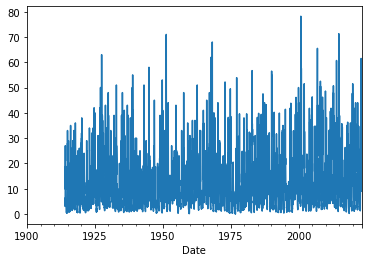

In [92]:
timeseries_SE.loc[:, "751"].plot()

* At this part we can save our original data.

First we rename our columns to our code pattern, and then export the data:

In [93]:
network_SE, timeseries_SE = geospatialfunctions.new_code_function(network_country_input = network_SE.reset_index(inplace = False), 
                                                                timeseries_country_input = timeseries_SE, 
                                                                name_col_in_network = "code", country = "SE")

network_SE

code             name            river    area  elev      lon      lat  \
0      138    ÖVRE HYNDEVAD        HJÄLMAREN  4044.2   NaN  16.4659  59.3221   
1    10006      KARESUVANTO        MUONIOÄLV  5960.4   NaN  22.4779  68.4437   
2    10016           MAGNOR      VRÅNGSÄLVEN   359.5   NaN  12.1873  59.9546   
3     1069          MÖCKELN          MÖCKELN  1026.0   NaN  14.1220  56.6654   
4     1083         LILLGLÄN           TÄNNÅN    64.6   NaN  12.1278  62.6386   
..     ...              ...              ...     ...   ...      ...      ...   
285    751       VASSBOTTEN  ENNINGDALSÄLVEN   624.1   NaN  11.5368  58.8771   
286    855          GETEBRO         ALSTERÅN  1332.7   NaN  16.1639  56.9996   
287    887         SOLVEDEN           SÄVEÅN  1109.0   NaN  12.4423  57.8754   
288    957  ÖVRE ABISKOJOKK       TORNEÄLVEN   566.3   NaN  18.7841  68.3607   
289     97        GIMDALSBY           IDSJÖN  2163.6   NaN  15.7092  62.8193   

    country new_code  
0        SE  SE00001  
1        SE  SE00002  
2        SE  SE00003  
3        SE  SE00004  
4        SE  SE00005  
..      ...      ...  
285      SE  SE00286  
286      SE  SE00287  
287      SE  SE00288  
288      SE  SE00289  
289      SE  SE00290  

[290 rows x 9 columns]

In [95]:
timeseries_SE

SE00001  SE00002  SE00003  SE00004  SE00005  SE00006  SE00007  \
Date                                                                        
1900-01-01     12.0      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02     11.0      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03     11.0      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04     11.0      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05     11.0      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-04-06     63.5     77.0     5.53     22.5    0.116      NaN     2.20   
2023-04-07     64.5     77.0     5.30     22.5    0.114      NaN     2.19   
2023-04-08     64.6     77.0     5.47     22.5    0.111      NaN     2.19   
2023-04-09     64.2     78.0     5.91     22.5    0.109      NaN     2.19   
2023-04-10     63.2     80.0     6.67     22.5    0.108      NaN     2.19   

            SE00008  SE00009  SE00010  ...  SE00281  SE00282  SE00283  \
Date                                   ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-04-06      NaN     1.45     16.4  ...      NaN     4.28     16.8   
2023-04-07      NaN     1.44     15.6  ...      NaN     4.28     16.3   
2023-04-08      NaN     1.44     14.7  ...      NaN     4.25     15.8   
2023-04-09      NaN     1.46     12.9  ...      NaN     4.22     15.3   
2023-04-10      NaN     1.47     12.4  ...      NaN     4.21     15.0   

            SE00284  SE00285  SE00286  SE00287  SE00288  SE00289  SE00290  
Date                                                                       
1900-01-01      NaN      NaN      NaN      NaN     10.0      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN     10.0      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN     10.0      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN     11.0      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN     11.0      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-04-06      NaN     24.3     18.6     18.5     41.0    0.485     7.72  
2023-04-07      NaN     24.3     18.1     18.7     41.0    0.474     7.72  
2023-04-08      NaN     23.6     17.7     18.9     41.0    0.494     7.72  
2023-04-09      NaN     23.0     17.2     19.1     37.0    0.469     7.72  
2023-04-10      NaN     22.7     16.8     19.3     37.0    0.452     7.72  

[45025 rows x 290 columns]

<AxesSubplot:xlabel='Date'>

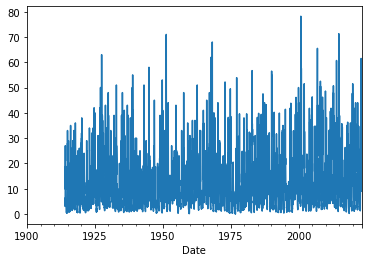

In [94]:
timeseries_SE.loc[:, "SE00286"].plot()

In [97]:
# Check if any column name is NaN
if any(pd.isna(column) for column in timeseries_SE.columns):
    nan_column_names = [column for column in timeseries_SE.columns if pd.isna(column)]
    print("Columns with NaN names:", nan_column_names)
else:
    print("No columns with NaN names.")

No columns with NaN names.


In [96]:
# And here we save our original data:
timeseries_SE.to_csv(r'Julia\timeseries\timeseries_SEo.csv')
network_SE.to_excel(r'Julia\timeseries\network_SEo.xlsx')

* Here we start our gap analysis part:

In [147]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_SE.loc["1981":"2020", :], network_SE.loc[:, ["lon", "lat"]])
summarygapsstations

CoordX   CoordY  NumGaps  PercentageGaps
Code                                            
10006  22.4779  68.4437      0.0        0.000000
10016  12.1873  59.9546   1096.0        7.501711
1069   14.1220  56.6654      0.0        0.000000
1083   12.1278  62.6386      0.0        0.000000
11     22.4077  67.4066      0.0        0.000000
...        ...      ...      ...             ...
751    11.5368  58.8771      0.0        0.000000
855    16.1639  56.9996      0.0        0.000000
887    12.4423  57.8754   8787.0       60.143737
957    18.7841  68.3607   1559.0       10.670773
97     15.7092  62.8193      0.0        0.000000

[294 rows x 4 columns]

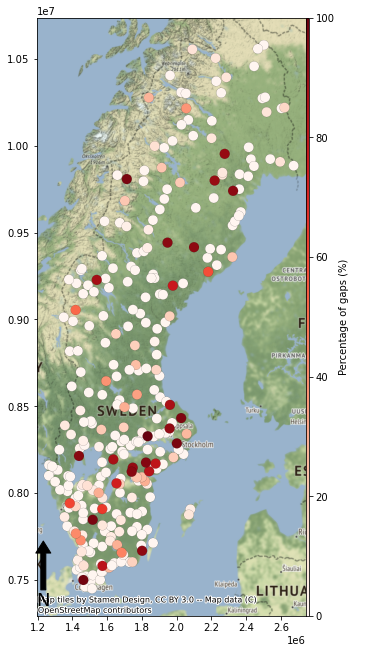

In [148]:
figplot, axesplot = geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                                       figsizeproj = (18, 11), cmapproj = "Reds", legend_title = "Percentage of gaps (%)",
                                       legend_orientation = "vertical", pad_map = 0, markersize_map = 100,
                                       north_arrow = True, 
                                       set_map_limits = False, minx = -25, miny = 35, maxx = 30, maxy = 72)

In [149]:
idcondition = summarygapsstations[summarygapsstations.PercentageGaps < 50.0].index.tolist()
len(idcondition)

261

In [150]:
timeseriesfinalcondition = timeseries_SE.loc[:, idcondition]
timeseriesfinalcondition

10006  10016  1069   1083  11  1123  1159  1160  1166  1169  ...  \
Date                                                                     ...   
1900-01-01    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN   NaN  ...   
1900-01-02    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN   NaN  ...   
1900-01-03    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN   NaN  ...   
1900-01-04    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN   NaN  ...   
1900-01-05    NaN    NaN   NaN    NaN NaN   NaN   NaN   NaN   NaN   NaN  ...   
...           ...    ...   ...    ...  ..   ...   ...   ...   ...   ...  ...   
2023-04-06   77.0   5.53  22.5  0.116 NaN  2.20   NaN  1.45  16.4   NaN  ...   
2023-04-07   77.0   5.30  22.5  0.114 NaN  2.19   NaN  1.44  15.6  1.41  ...   
2023-04-08   77.0   5.47  22.5  0.111 NaN  2.19   NaN  1.44  14.7  1.30  ...   
2023-04-09   78.0   5.91  22.5  0.109 NaN  2.19   NaN  1.46  12.9  1.24  ...   
2023-04-10   80.0   6.67  22.5  0.108 NaN  2.19   NaN  1.47  12.4  1.14  ...   

               5  558   591   654  736   740   751   855    957    97  
Date                                                                   
1900-01-01   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN    NaN   NaN  
1900-01-02   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN    NaN   NaN  
1900-01-03   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN    NaN   NaN  
1900-01-04   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN    NaN   NaN  
1900-01-05   NaN  NaN   NaN   NaN  NaN   NaN   NaN   NaN    NaN   NaN  
...          ...  ...   ...   ...  ...   ...   ...   ...    ...   ...  
2023-04-06  45.4  NaN  4.28  16.8  NaN  24.3  18.6  18.5  0.485  7.72  
2023-04-07  45.2  NaN  4.28  16.3  NaN  24.3  18.1  18.7  0.474  7.72  
2023-04-08  44.9  NaN  4.25  15.8  NaN  23.6  17.7  18.9  0.494  7.72  
2023-04-09  44.2  NaN  4.22  15.3  NaN  23.0  17.2  19.1  0.469  7.72  
2023-04-10  43.8  NaN  4.21  15.0  NaN  22.7  16.8  19.3  0.452  7.72  

[45025 rows x 261 columns]

In [151]:
networkfinalcondition = network_SE.loc[idcondition, :]
networkfinalcondition

name            river    area  elev      lon      lat  \
Code                                                                      
10006      KARESUVANTO        MUONIOÄLV  5960.4   NaN  22.4779  68.4437   
10016           MAGNOR      VRÅNGSÄLVEN   359.5   NaN  12.1873  59.9546   
1069           MÖCKELN          MÖCKELN  1026.0   NaN  14.1220  56.6654   
1083          LILLGLÄN           TÄNNÅN    64.6   NaN  12.1278  62.6386   
11            MÄNNIKKÖ     TÄRENDÖÄLVEN  5856.2   NaN  22.4077  67.4066   
...                ...              ...     ...   ...      ...      ...   
740              NYBRO           VOXNAN  2250.9   NaN  15.5252  61.3623   
751         VASSBOTTEN  ENNINGDALSÄLVEN   624.1   NaN  11.5368  58.8771   
855            GETEBRO         ALSTERÅN  1332.7   NaN  16.1639  56.9996   
957    ÖVRE ABISKOJOKK       TORNEÄLVEN   566.3   NaN  18.7841  68.3607   
97           GIMDALSBY           IDSJÖN  2163.6   NaN  15.7092  62.8193   

      country  
Code           
10006      SE  
10016      SE  
1069       SE  
1083       SE  
11         SE  
...       ...  
740        SE  
751        SE  
855        SE  
957        SE  
97         SE  

[261 rows x 7 columns]

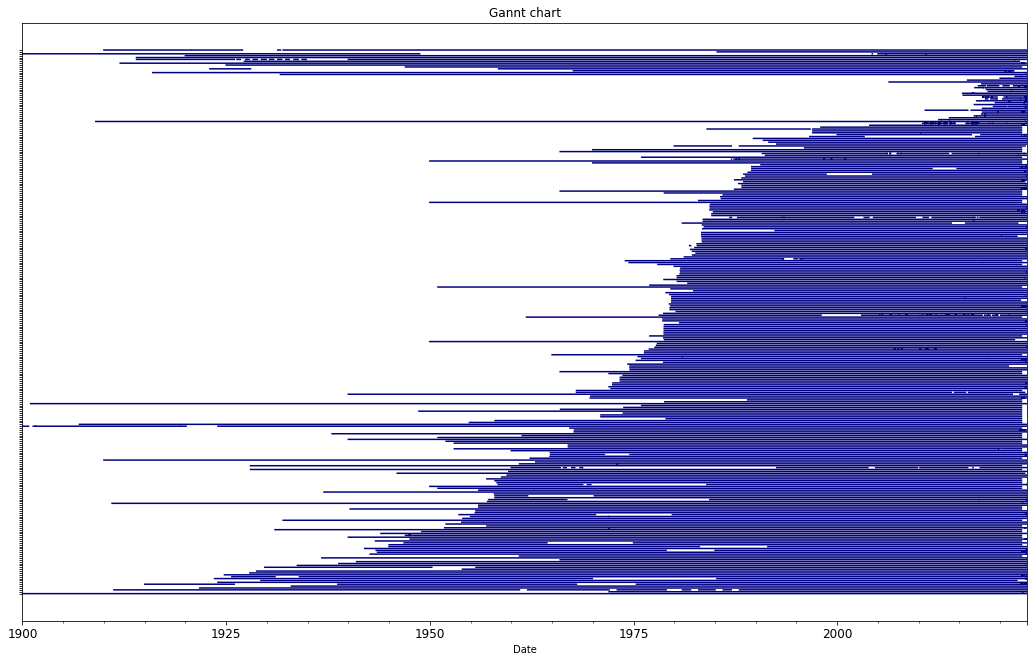

In [152]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_SE, figsize_chart = (18, 11), 
                                   showcodes = False,
                                   color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                   title_chart = "Gannt chart")

In [153]:
timeseriesfinalcondition.to_excel(r'Julia\timeseries\timeseries_SE.xlsx') 
networkfinalcondition.to_excel(r'Julia\timeseries\network_SE.xlsx')